# Flights Price Prediction

#### 2019110477 김부겸

#### 각 feature를 통해 비행기의 티켓 가격을 예측하는 데이터 입니다.

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [2]:
def rangeplot(df, x, y, color=None, alpha=0.1, marker="<"):

    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker=marker), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )


In [3]:
flights=pd.read_csv('Clean_Dataset.csv')
flights.rename(columns={'class': 'sit_class'}, inplace=True)
flights=flights.drop('Unnamed: 0',axis=1)
flights.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,sit_class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


### 변수 설명

airline : 항공사  
flight : 비행기 기종  
source_city : 출발 지역  
departure_time : 도착 시간  
stops : 멈춘 횟수  
arrival_time : 출발 시간  
destination_city : 도착 지역  
sit_class : 비행기 좌석 등급  
duration : 비행시간  
day_left : 출발 전 남은 날짜 (일 기준)  
price : 비행기 표 가격

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   sit_class         300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


결측 값 없음

In [5]:
flights['sit_class'] = pd.Categorical(
    flights['sit_class'],
    categories =['Economy','Business'],
    ordered=True
)

### Price 분석

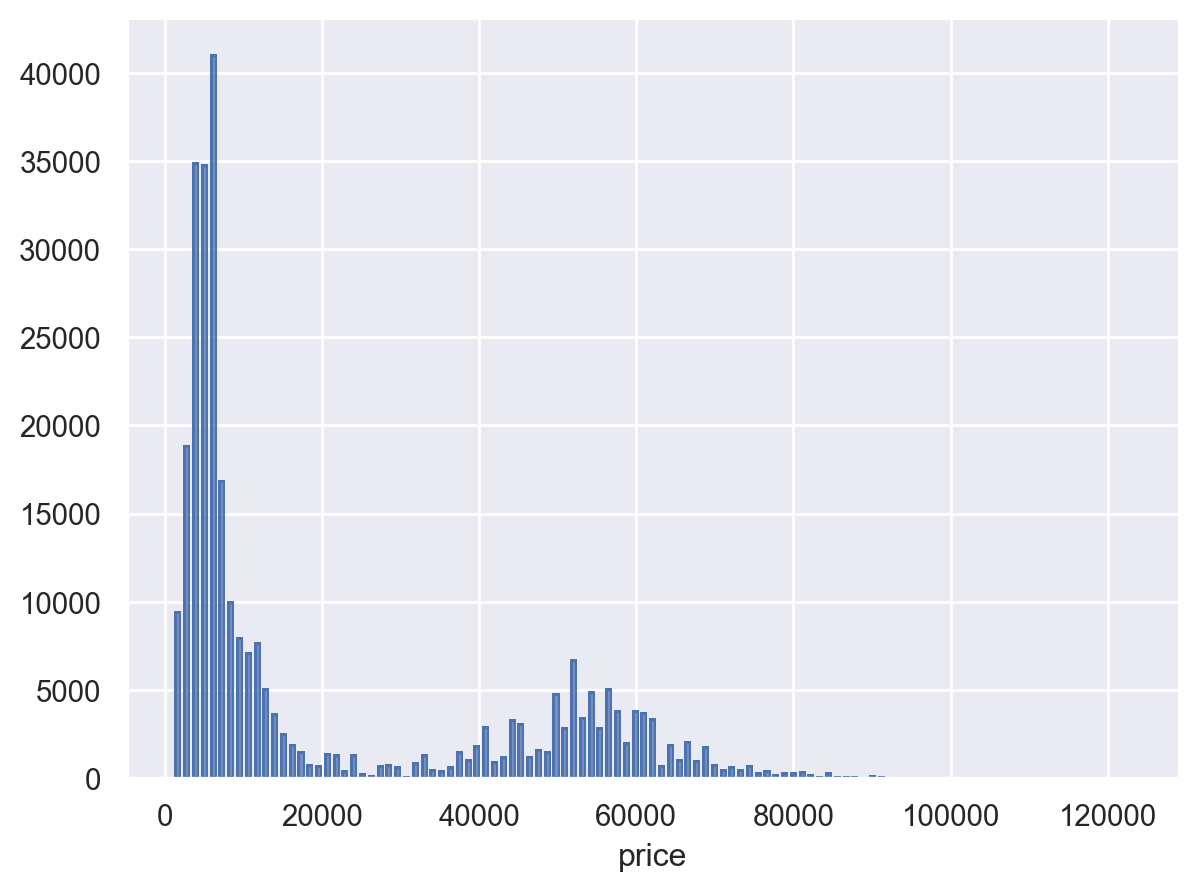

In [6]:
(
    so.Plot(flights,x='price')
    .add(so.Bar(),so.Hist())
)

분포가 2개가 있는 것으로 관측됨.

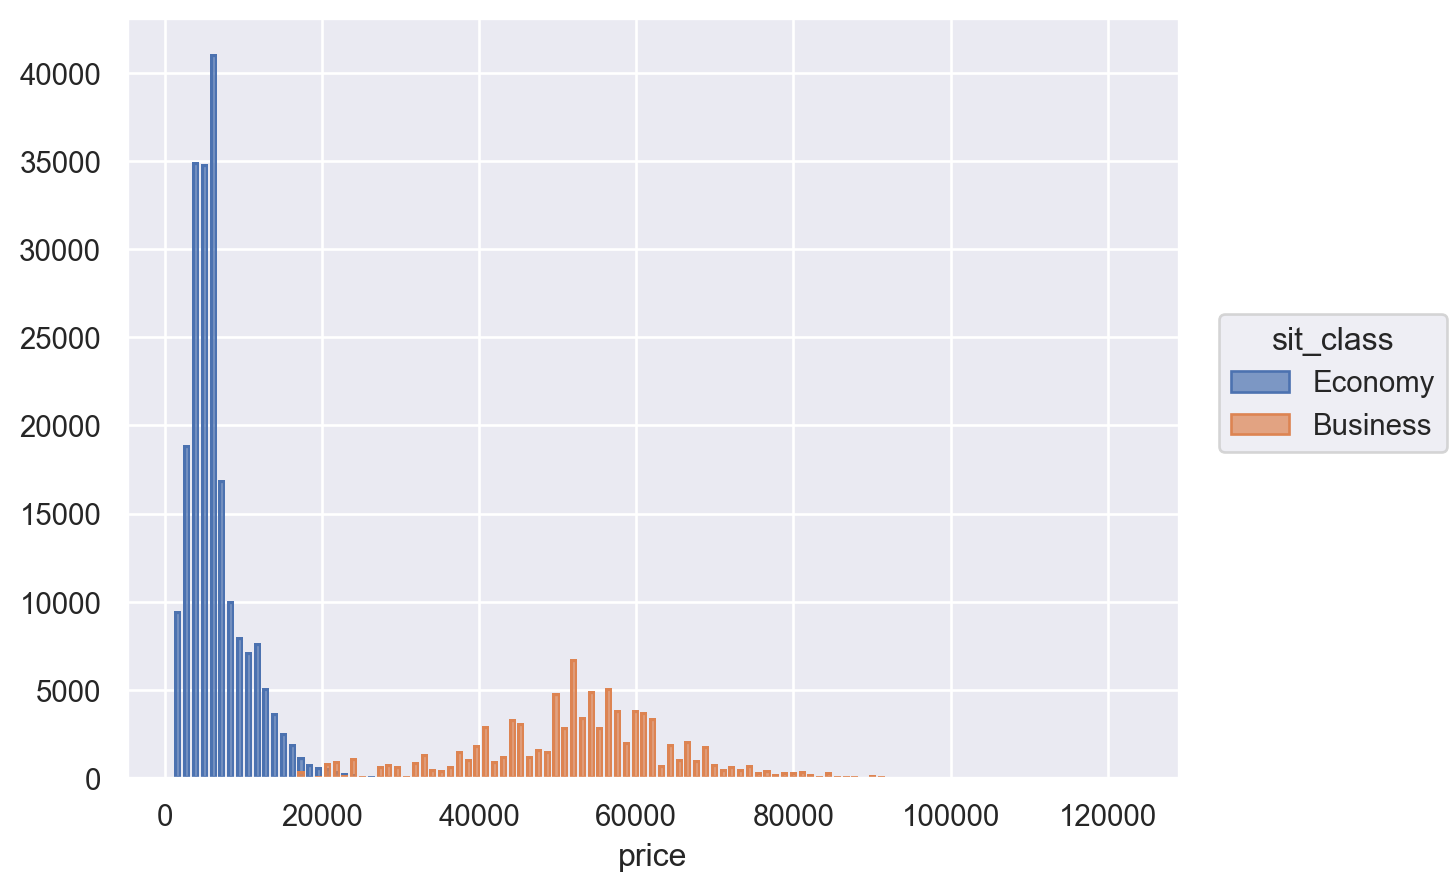

In [7]:
(
    so.Plot(flights,x='price',color='sit_class')
    .add(so.Bar(),so.Hist())
)

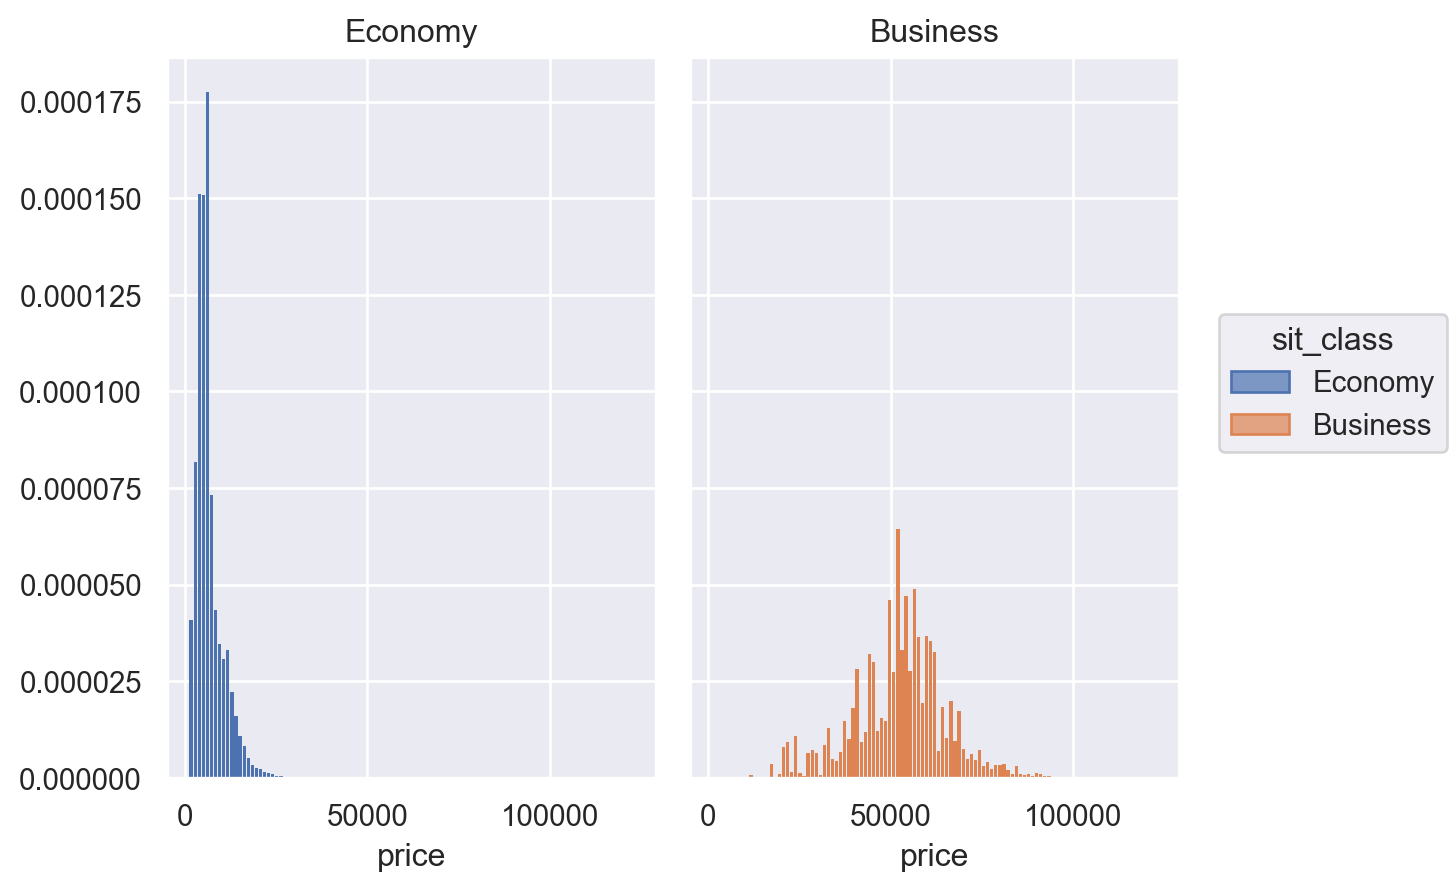

In [8]:
(
    so.Plot(flights,x='price',color='sit_class')
    .add(so.Bar(),so.Hist('density'))
    .facet('sit_class')
)

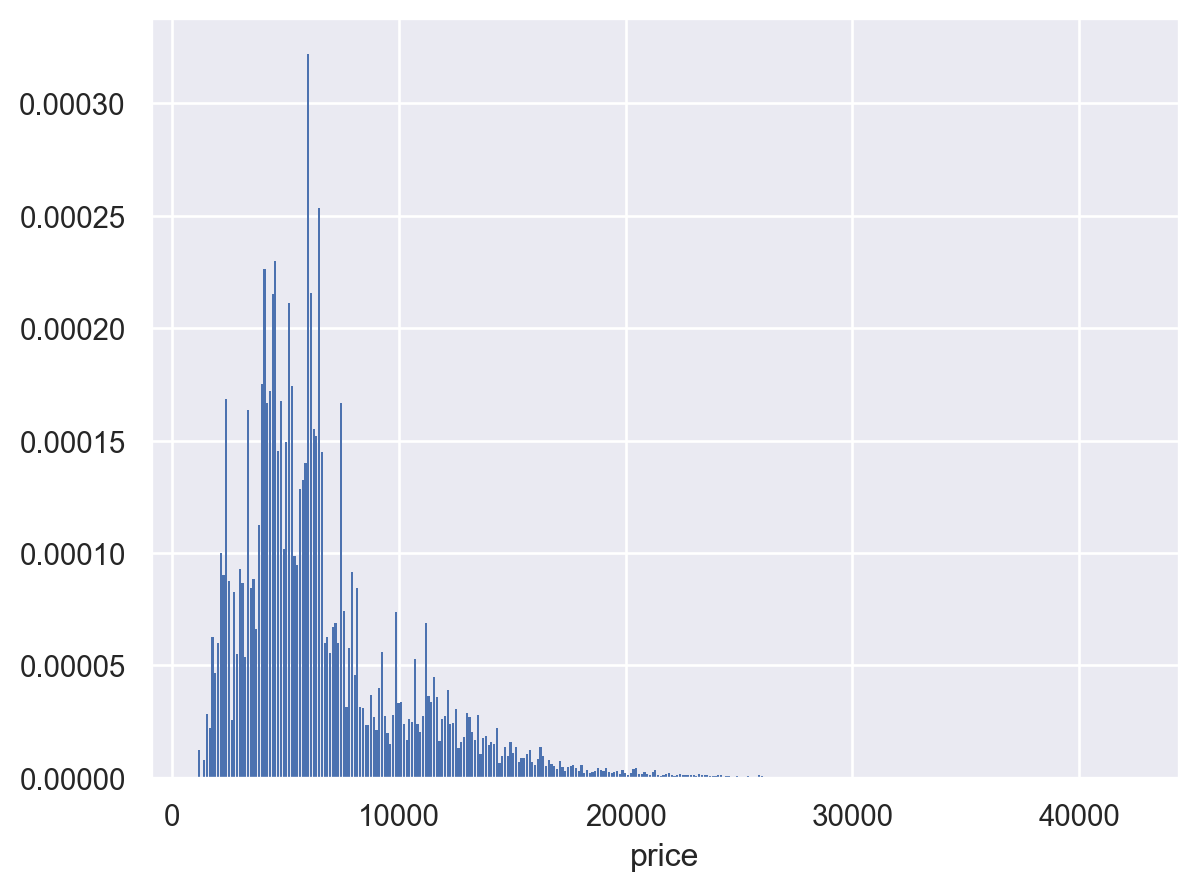

In [9]:
(
    so.Plot(flights.loc[flights['sit_class'] == 'Economy'],x='price')
    .add(so.Bar(),so.Hist('density'))
)

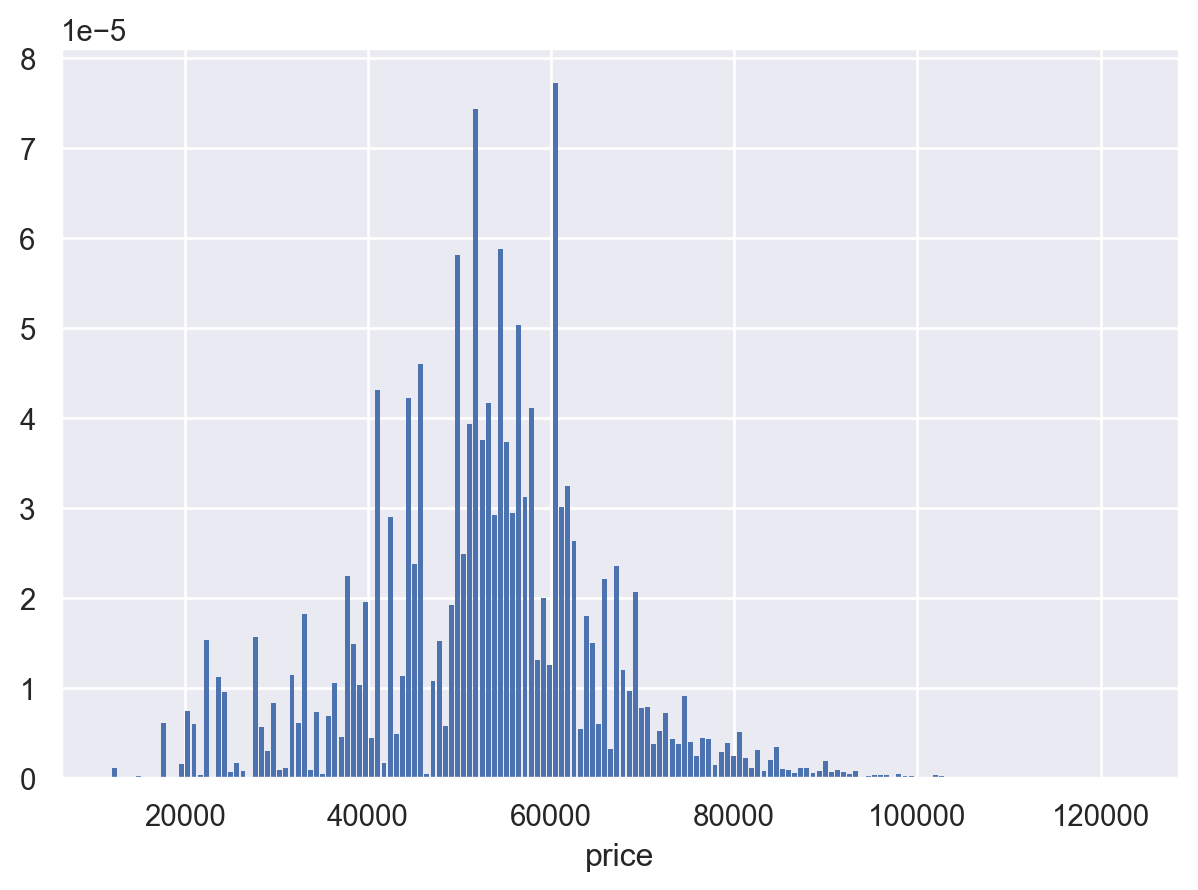

In [10]:
(
    so.Plot(flights.loc[flights['sit_class'] == 'Business'],x='price')
    .add(so.Bar(),so.Hist('density'))
)

### Price 와 sit_class (sit_class에 따른 Price의 분포는 어떠할 것인가?)

위에 Price가 2부분에 나눠서 있는 것 처럼 보였는데 sit_class 에 따라 어떻게 다른지 rangeplot으로 확인.

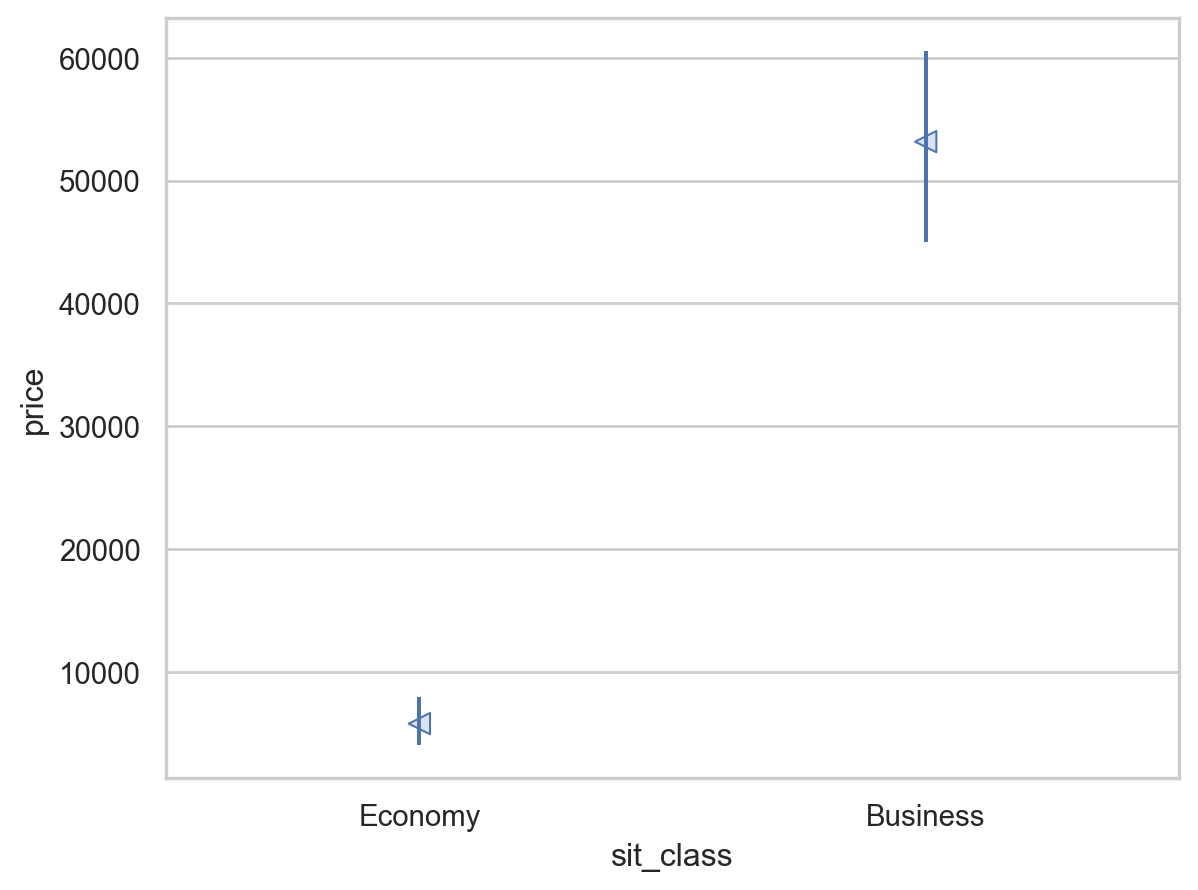

In [11]:
rangeplot(flights,x='sit_class',y='price')

당연한 사실이겠지만 Business 석이 Economy석 보다 가격이 훨씬 비쌈. 따로 가격을 분석하는 방향으로 가는 것이 맞을 것 같음.

### Airline과 Price (특정 sit_class만 운영하는 Airline이 있을지와 그 가격분포는 어떠한가)

특정 항공사에 따라 Price의 차이를 보려고 한다. 특정 sit_class를 운영하는 고가 항공사와 저가 항공사의 존재를 확인해보려고 한다.

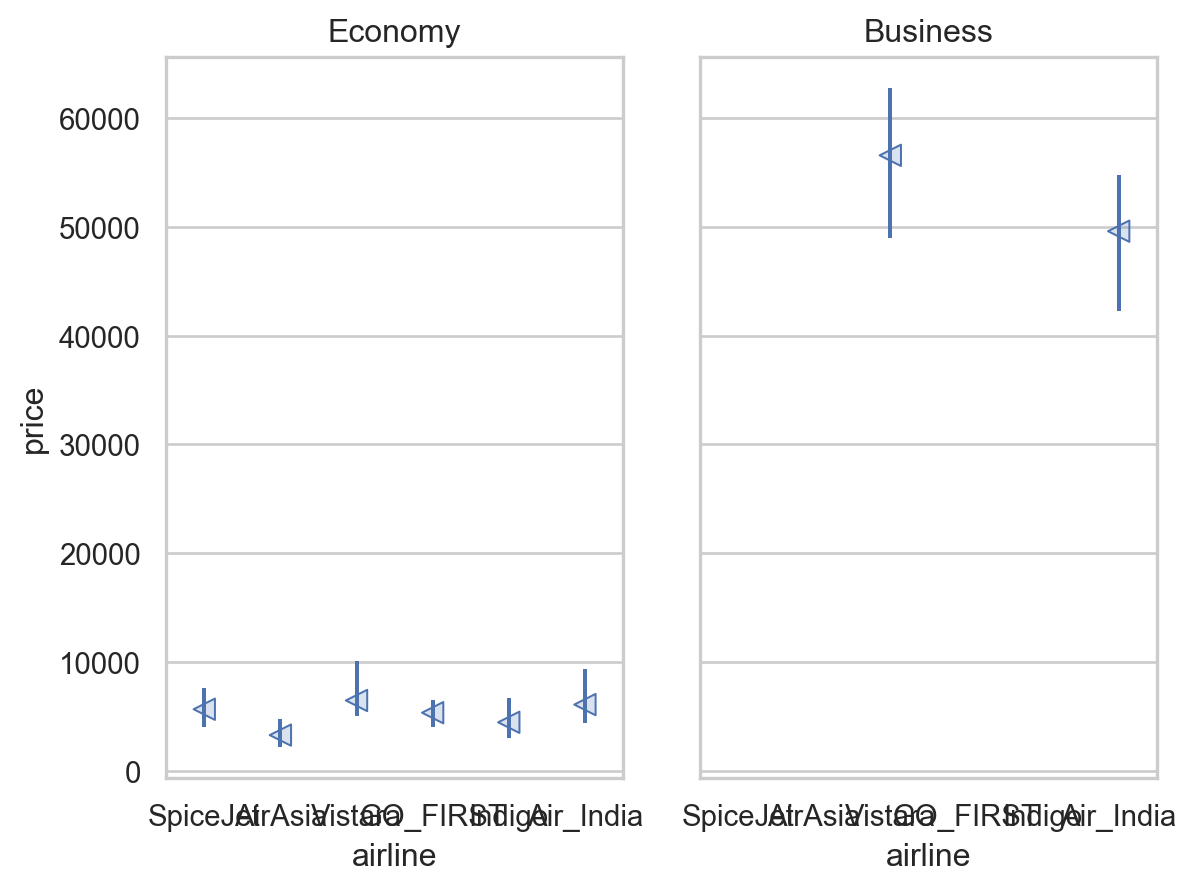

In [12]:
rangeplot(flights,x='airline',y='price').facet('sit_class')

Air_India와 Vistra만 비지니스 클래스 항공권을 운행하고 있음. 이들을 고가 항공사로 볼 수 있음. 특히 Economy에서는 air_Asia가 가장 저렴한 항공권을 가지고 있음. 항공사에 따라 가격차이가 존재함.

### Days_left 와 Price

티켓 가격이 출발하기 기간에 따라 차이가 있는지를 보려고한다.

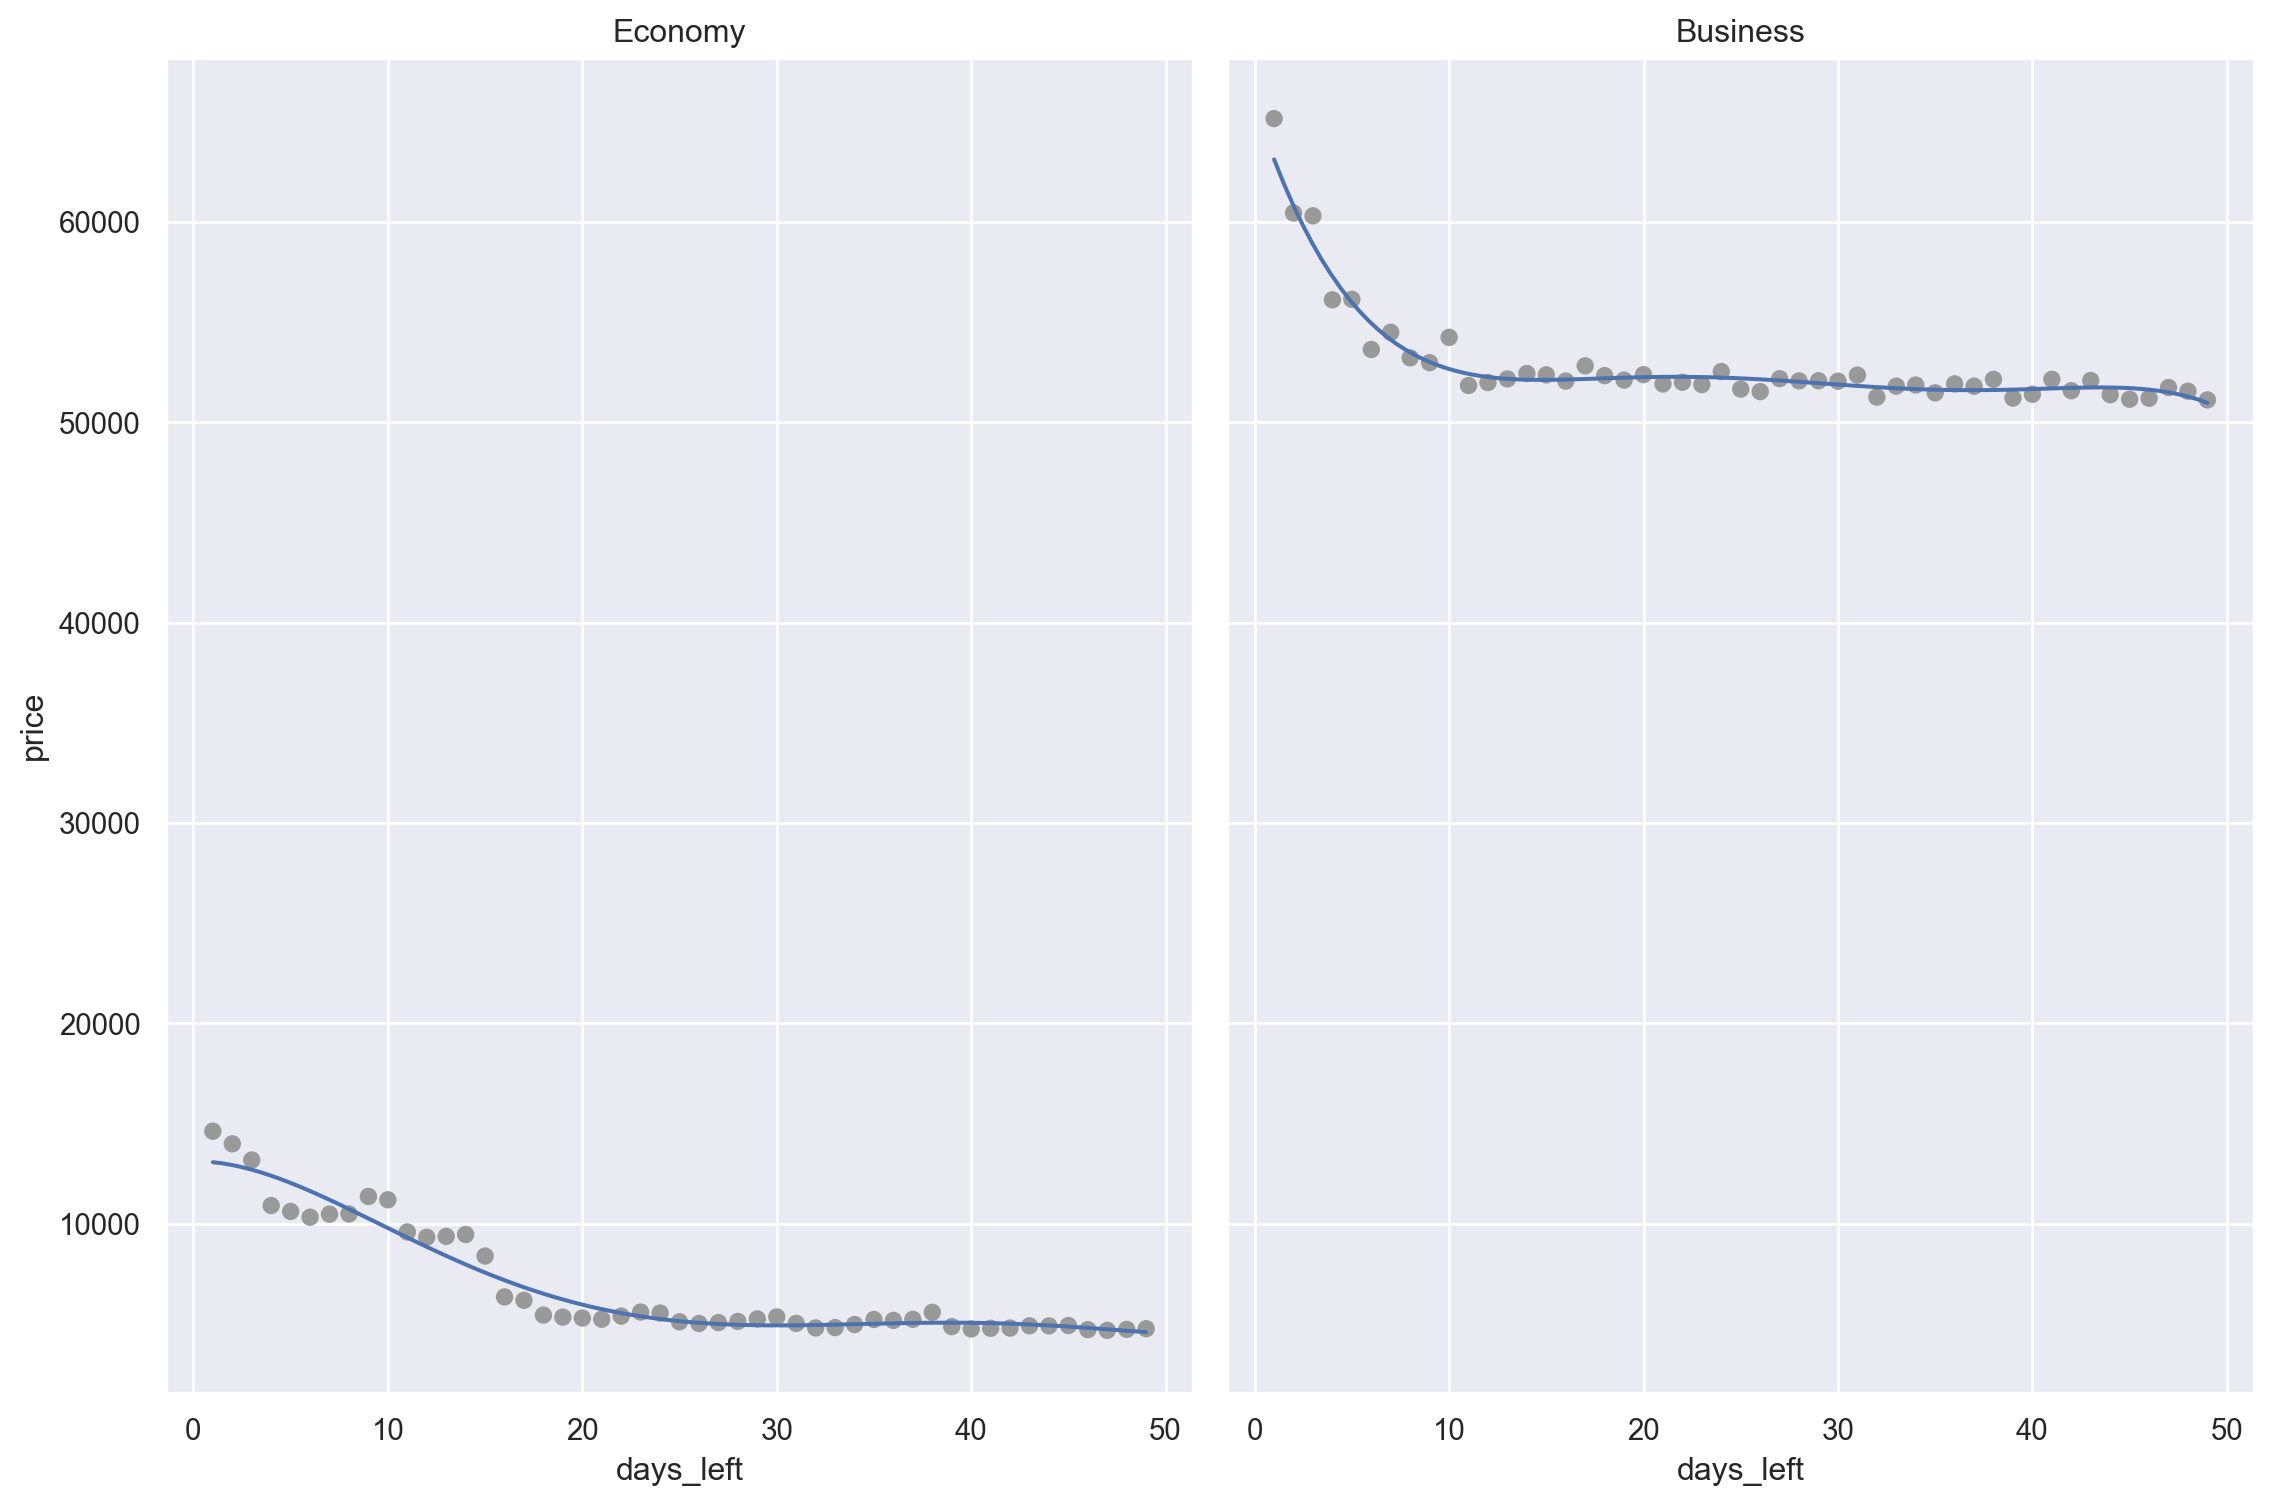

In [13]:
(
    so.Plot(flights,x='days_left',y='price')
    .add(so.Dot(color='.6'),so.Agg('mean'))
    .add(so.Line(),so.PolyFit(5))
    .facet('sit_class')
    .layout(size=(12,8))
)

In [14]:
(
    flights
    .groupby(['sit_class','days_left'])['price']
    .mean()
)

sit_class  days_left
Economy    1            14613.179410
           2            13980.828244
           3            13174.050992
           4            10901.386284
           5            10605.918315
                            ...     
Business   45           51160.208098
           46           51209.790072
           47           51742.102235
           48           51558.758230
           49           51124.505820
Name: price, Length: 98, dtype: float64

20일 전까지는 가격이 비슷하나 출발을 가까이 앞둘수록 수요? 가 급증하면서 가격이 증가함. 좌석과 상관없이 출발과 가까워 질수록 가격이 급증함. term을 나눠서 하면 더 정확할거 같음.

In [15]:
flights=(
    flights
    .assign(
        days_term= lambda x: np.where(x.days_left <15 ,'little_left','Many_left')
    )
)

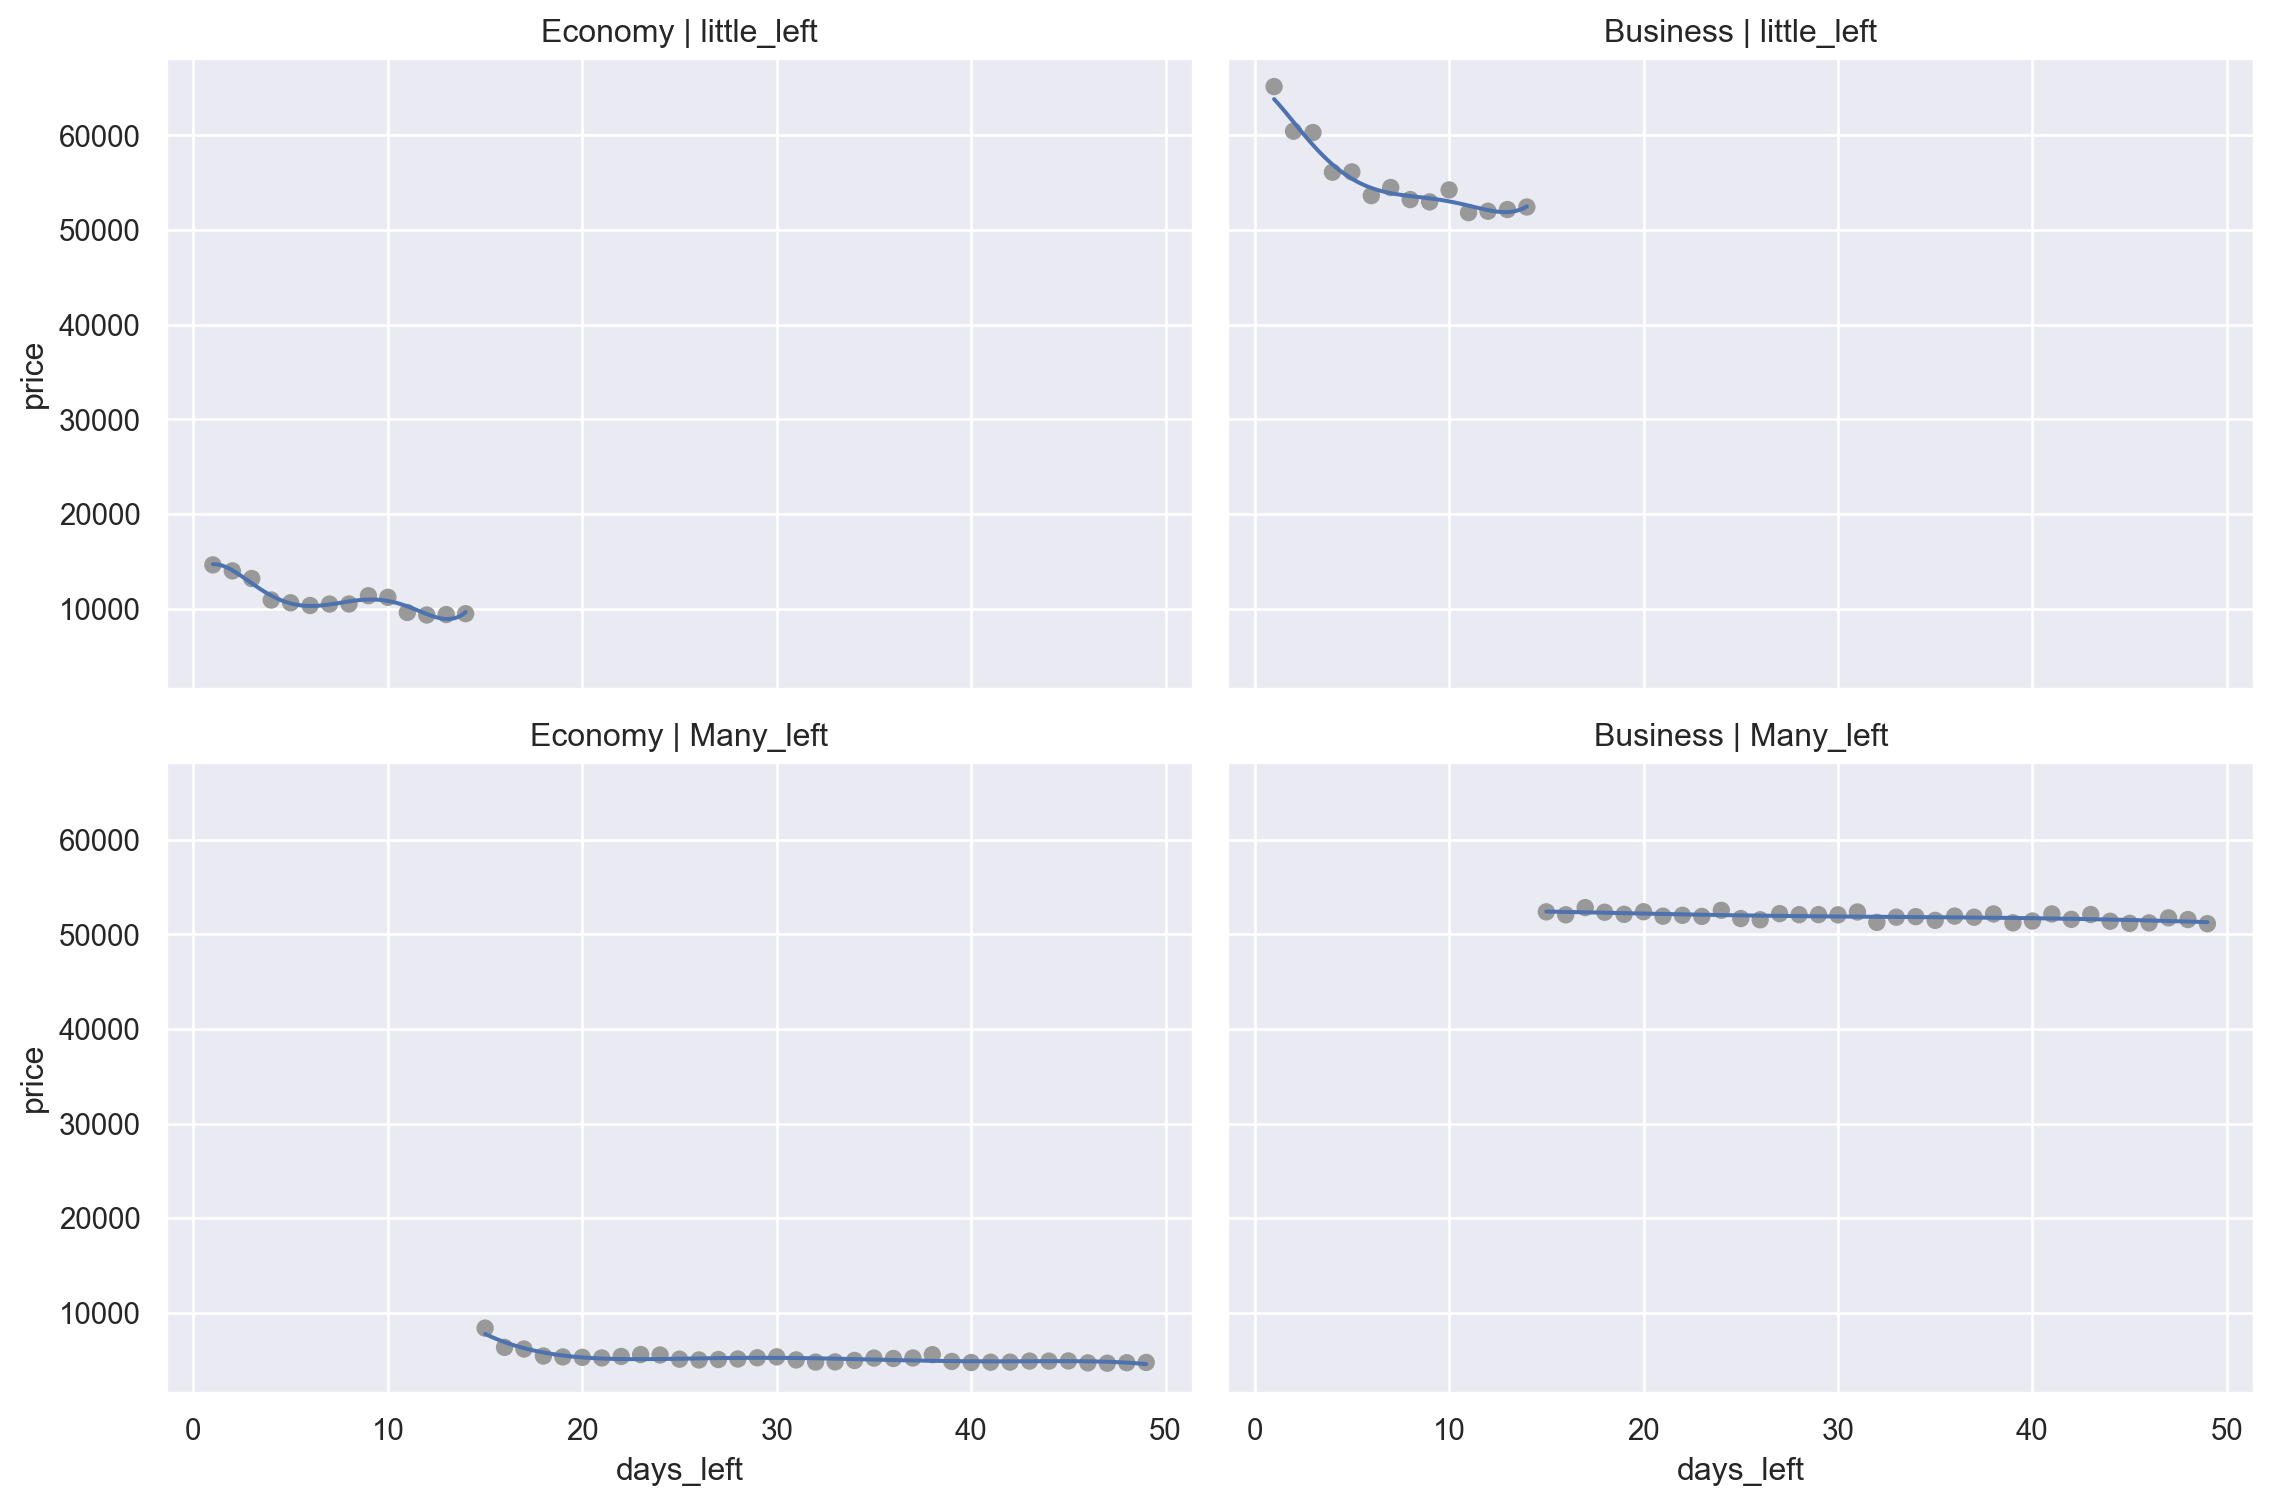

In [16]:
#term으로 나누기
(
    so.Plot(flights,x='days_left',y='price')
    .add(so.Dot(color='.6'),so.Agg('mean'))
    .add(so.Line(),so.PolyFit(5))
    .facet(col='sit_class',row='days_term')
    .layout(size=(12,8))
)

### Departure Time과 Arrival Time에 따른 Price 분석

출발시간과 도착시간에 따라 가격변화를 보고자 한다.

In [17]:
(
    flights
    .groupby(['departure_time','sit_class'])['price']
    .agg(['size','mean'])
    .reset_index()
)

,departure_time,sit_class,size,mean
0,Afternoon,Economy,35245,6473.095872
1,Afternoon,Business,12549,51056.863495
2,Early_Morning,Economy,46688,6560.315392
3,Early_Morning,Business,20102,52446.000050
4,Evening,Economy,44207,6360.750741
5,Evening,Business,20895,52695.837090
6,Late_Night,Economy,1168,4784.699486
7,Late_Night,Business,138,47471.971014
8,Morning,Economy,48821,7119.019664
9,Morning,Business,22325,53365.483091


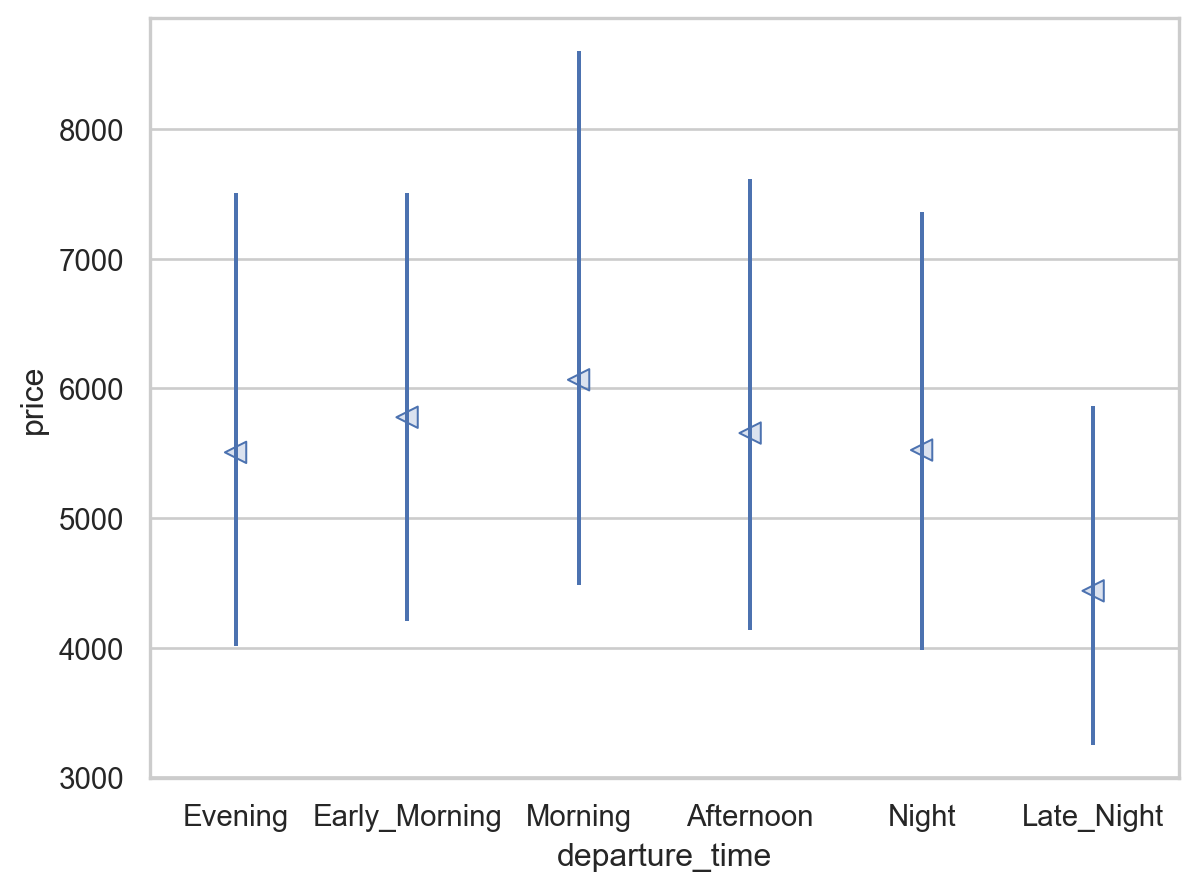

In [18]:
#Economy 석에서 departure_time과 Price의 관계

rangeplot(flights.loc[flights['sit_class'] == 'Economy'],x='departure_time',y='price')

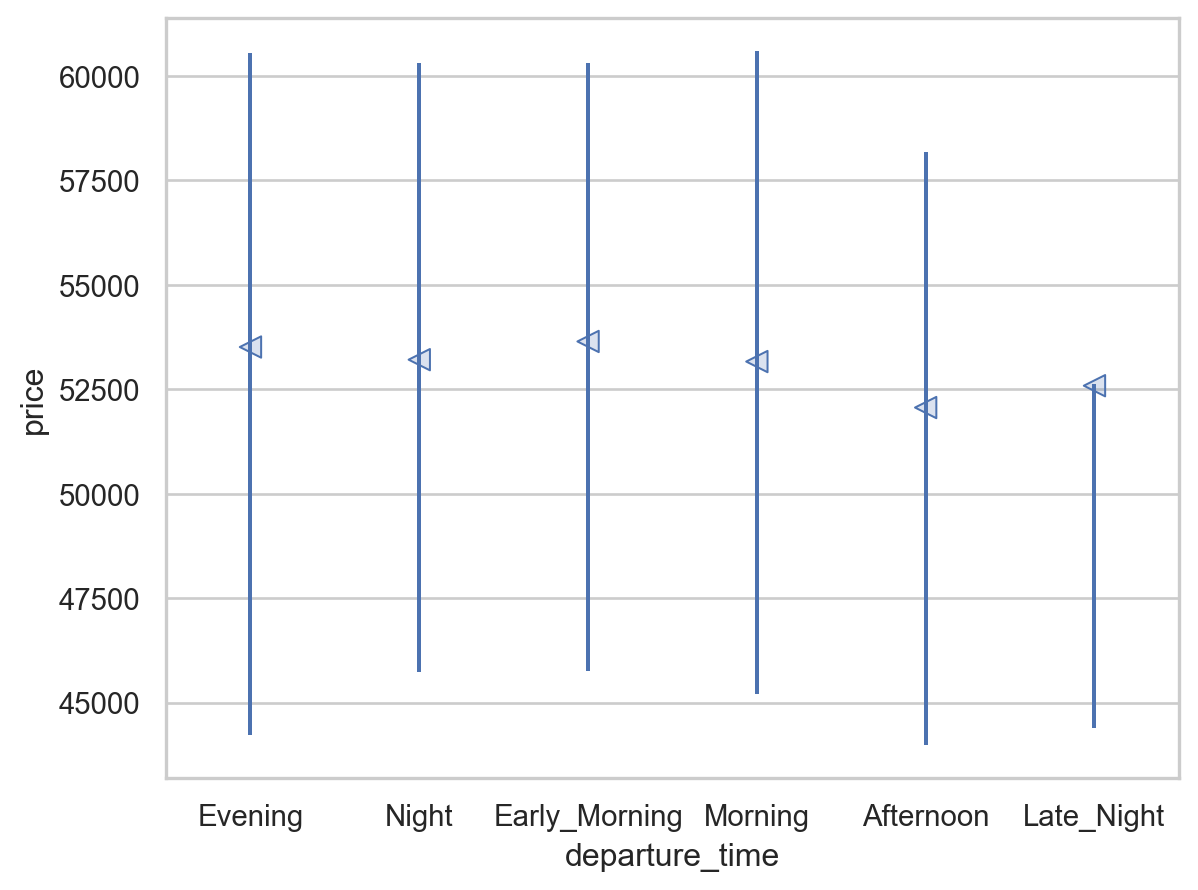

In [19]:
#Business 석에서 departure_time과 Price의 관계

rangeplot(flights.loc[flights['sit_class'] == 'Business'],x='departure_time',y='price')

도착 시간이 Economy와 Business 주로 아침보다는 늦은 저녁이 더 쌈. 늦은 밤에 출발하면 새벽에 도착하는 등 수요가 적기 때문일것임. 여기서는 departure_time에 대해서 Late_Night의 표본이 굉장히 적어서 단순히 Late_Night가 낮다고 활용하기는 어려움.

In [20]:
(
    flights
    .groupby(['arrival_time','sit_class'])['price']
    .agg(['size','mean'])
    .reset_index()
)

,arrival_time,sit_class,size,mean
0,Afternoon,Economy,27209,6407.028152
1,Afternoon,Business,10930,48585.240805
2,Early_Morning,Economy,11903,5336.658237
3,Early_Morning,Business,3514,47702.614969
4,Evening,Economy,51924,7206.771859
5,Evening,Business,26399,54195.230728
6,Late_Night,Economy,12168,5173.086538
7,Late_Night,Business,1833,51856.984724
8,Morning,Economy,40949,6416.474542
9,Morning,Business,21786,51956.226154


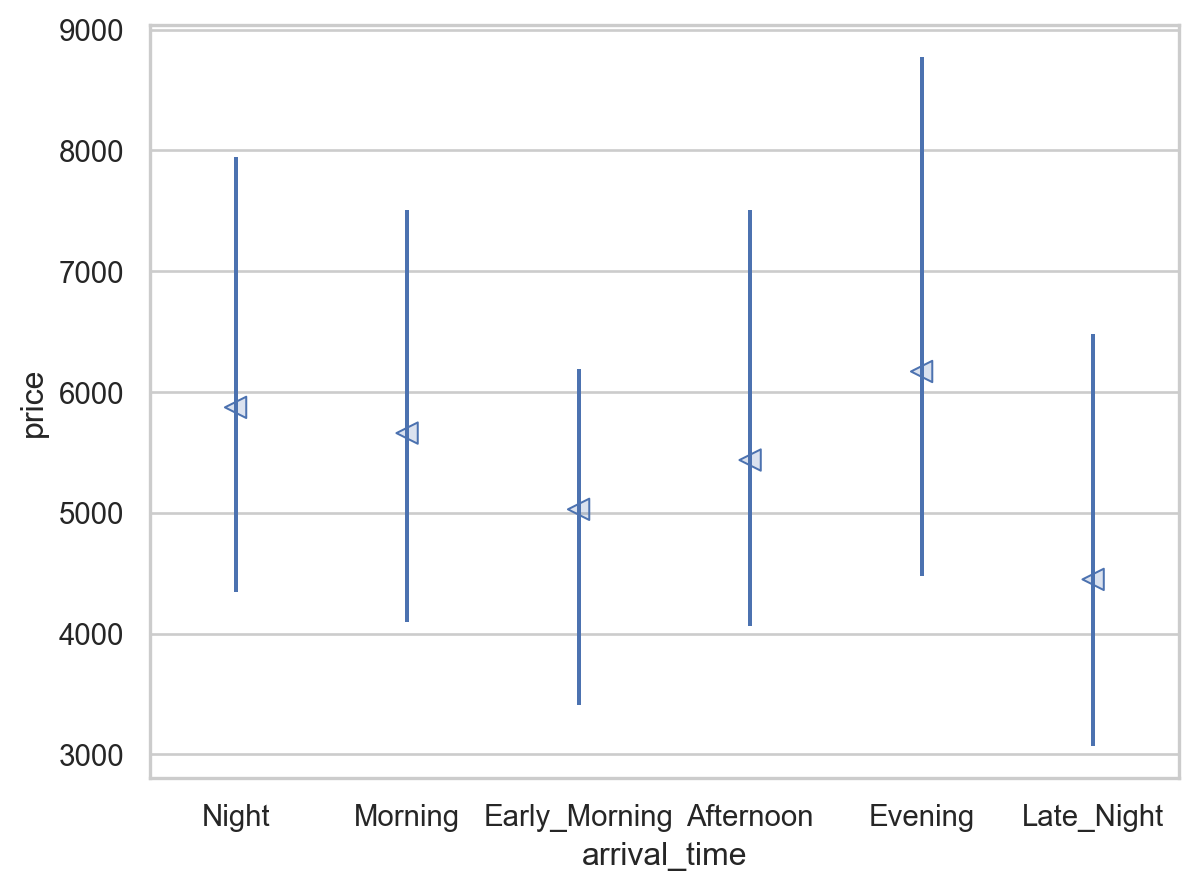

In [21]:
#Economy 석에서 arrival_time과 Price의 관계

rangeplot(flights.loc[flights['sit_class'] == 'Economy'],x='arrival_time',y='price')

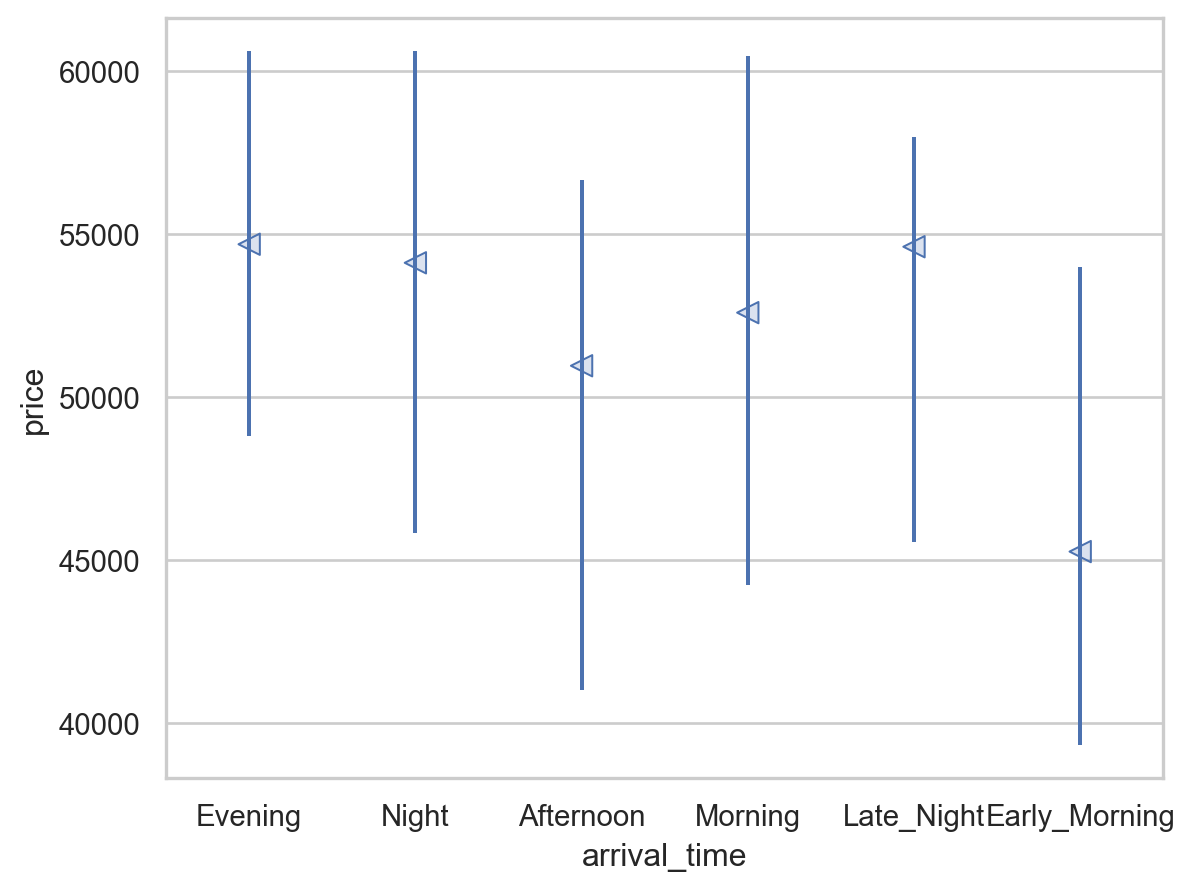

In [22]:
#Business 석에서 arrival_time과 Price의 관계

rangeplot(flights.loc[flights['sit_class'] == 'Business'],x='arrival_time',y='price')

도착시간은 Economy와 Business가 비슷한 형태를 보임 둘다 출발시간이 새벽시간이 더 싸고 오후가 비쌈. (주로 여행이든 업무든 늦게 도착하는 것은 수요가 적고 쌀수 밖에 없음)

### arrival_time과 departure_time의 관계
출발시간에 따른 도착시간은 어느 정도 관계가 클 것이다. 이들은 특정출발시간에 따라 도착시간은 정해져 있다. 이들의 관계가 유효한지 보고자 한다.

In [23]:
table_cut=(
    flights
    .groupby(['arrival_time','departure_time'])
    .size()
    .reset_index(name='n')
)

table_cut

,arrival_time,departure_time,n
0,Afternoon,Afternoon,3823
1,Afternoon,Early_Morning,12435
2,Afternoon,Evening,5407
3,Afternoon,Late_Night,73
4,Afternoon,Morning,10624
5,Afternoon,Night,5777
6,Early_Morning,Afternoon,1228
7,Early_Morning,Early_Morning,3185
8,Early_Morning,Evening,4626
9,Early_Morning,Late_Night,501


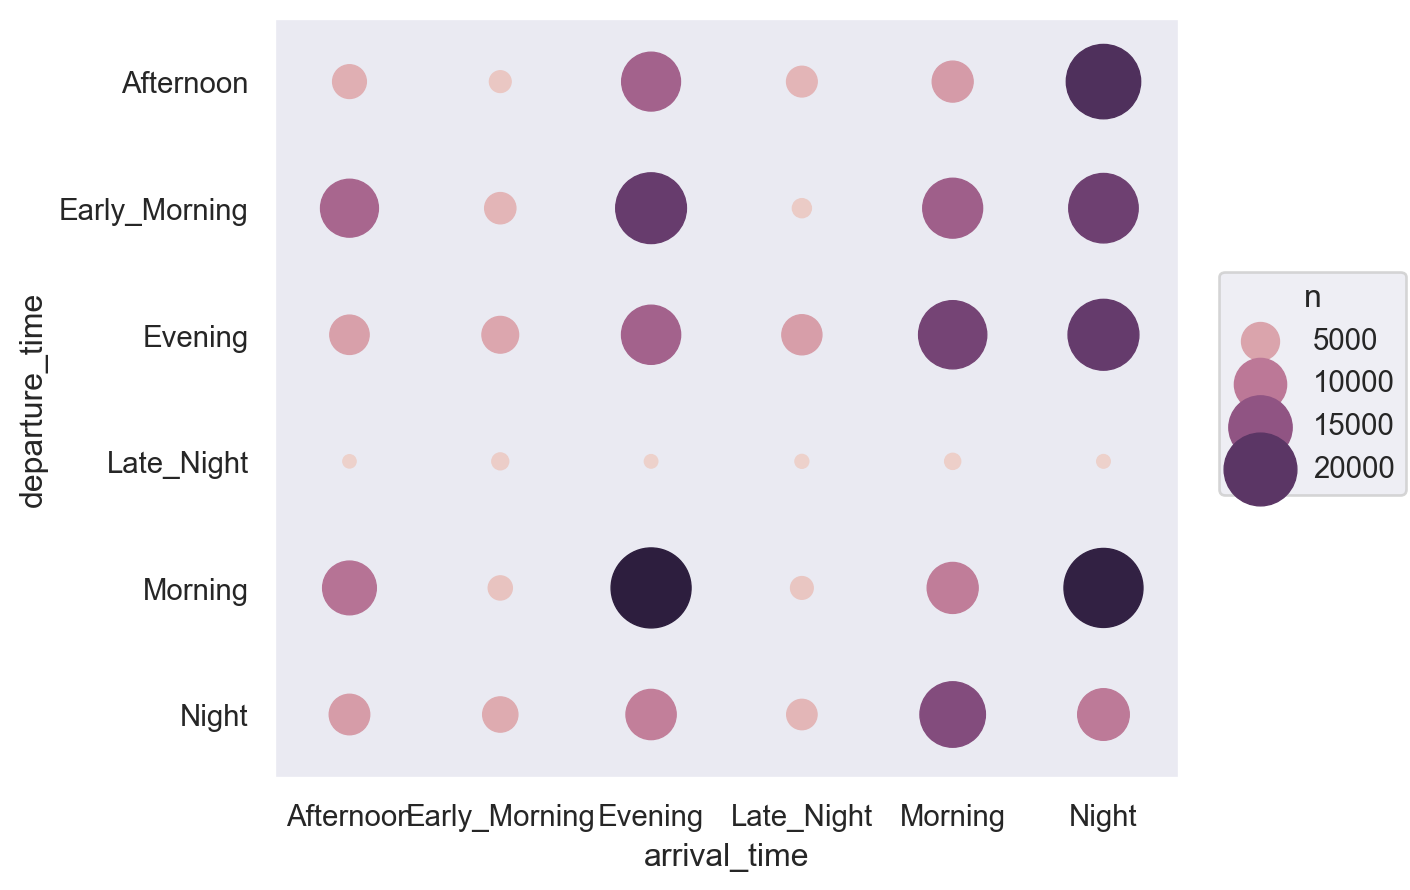

In [24]:
(
    so.Plot(table_cut,x='arrival_time',y='departure_time',pointsize='n',color='n')
    .add(so.Dot())
    .scale(pointsize=(5,30))
)

출발시간과 도착시간은 어느정도 상관관계를 갖는 것으로 보임. 특정 출발시간은 특정 도착시간에 연결이 되므로 그런것임.

### 출발 도시나 도착 도시에 따른 Price 의 변화

특정 도시에따라 Price가 변화하는지 보고자 한다. 변화를 sit_class에 따라 나눠서 살펴볼 것이다.

출발 도시

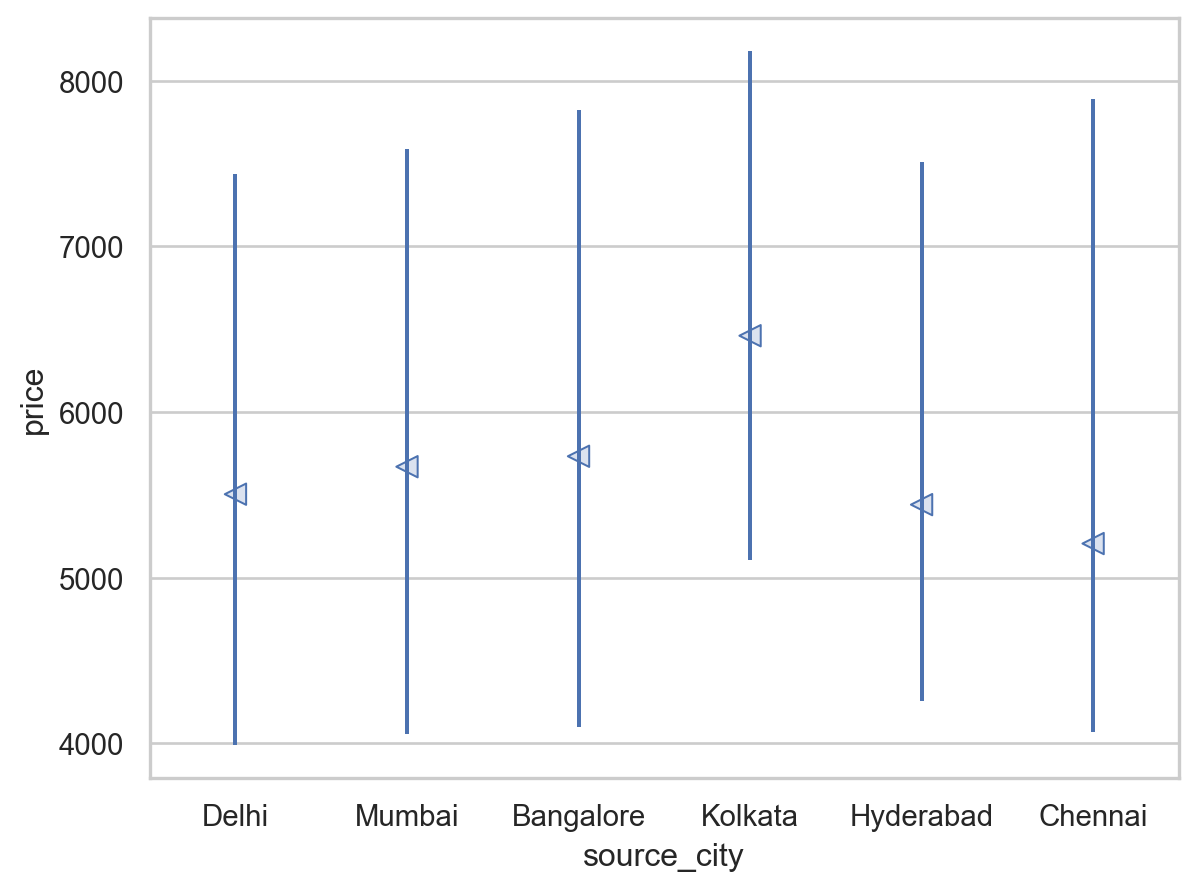

In [25]:
rangeplot(flights.loc[flights['sit_class'] == 'Economy'],x='source_city',y='price')

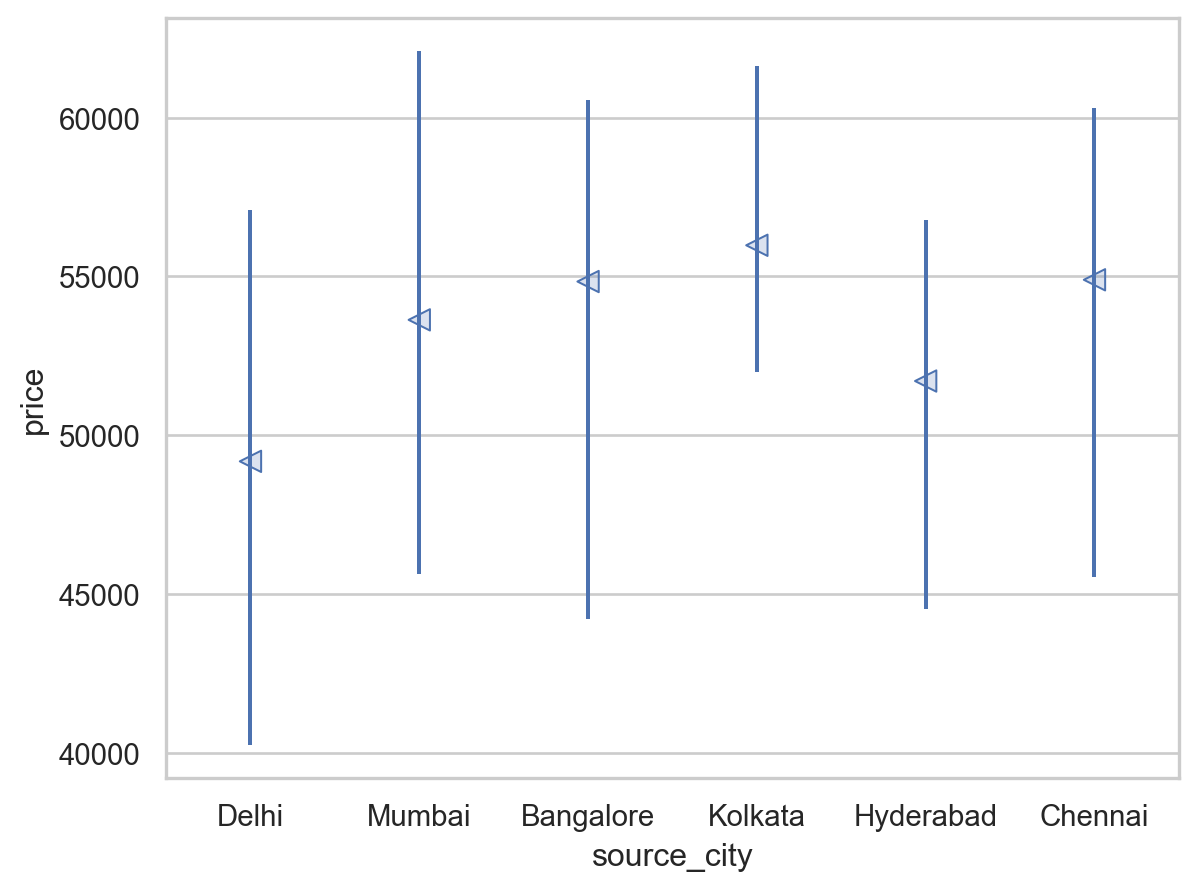

In [26]:
rangeplot(flights.loc[flights['sit_class'] == 'Business'],x='source_city',y='price')

Delhi에서 출발할때가 싸고 Kolkata에서 가격이 비쌈. 거리가 좀 영향이 클 거 같음. 이 도시들이 다른 도시에 비해 멀리 위치 해있으면 상대적으로 비쌀수 밖에 없음.

도착도시

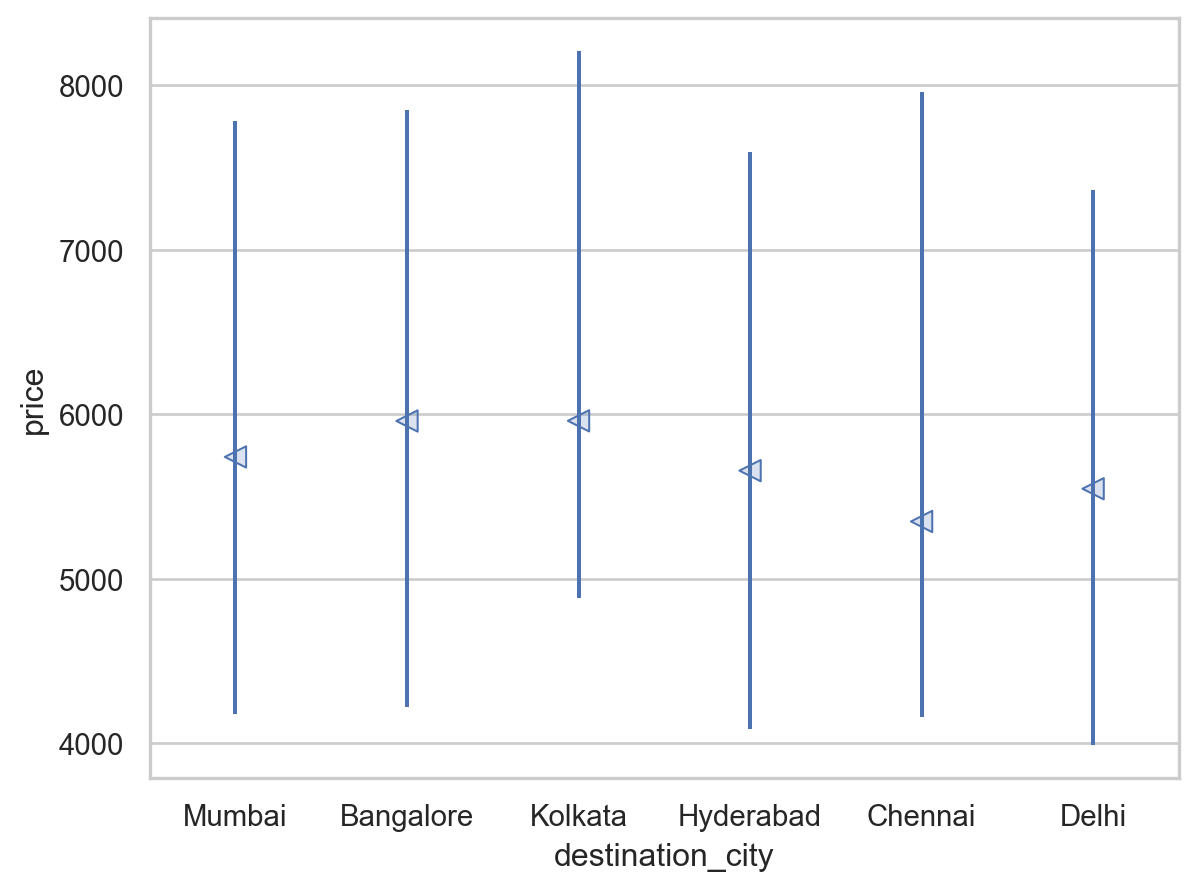

In [27]:
rangeplot(flights.loc[flights['sit_class'] == 'Economy'],x='destination_city',y='price')

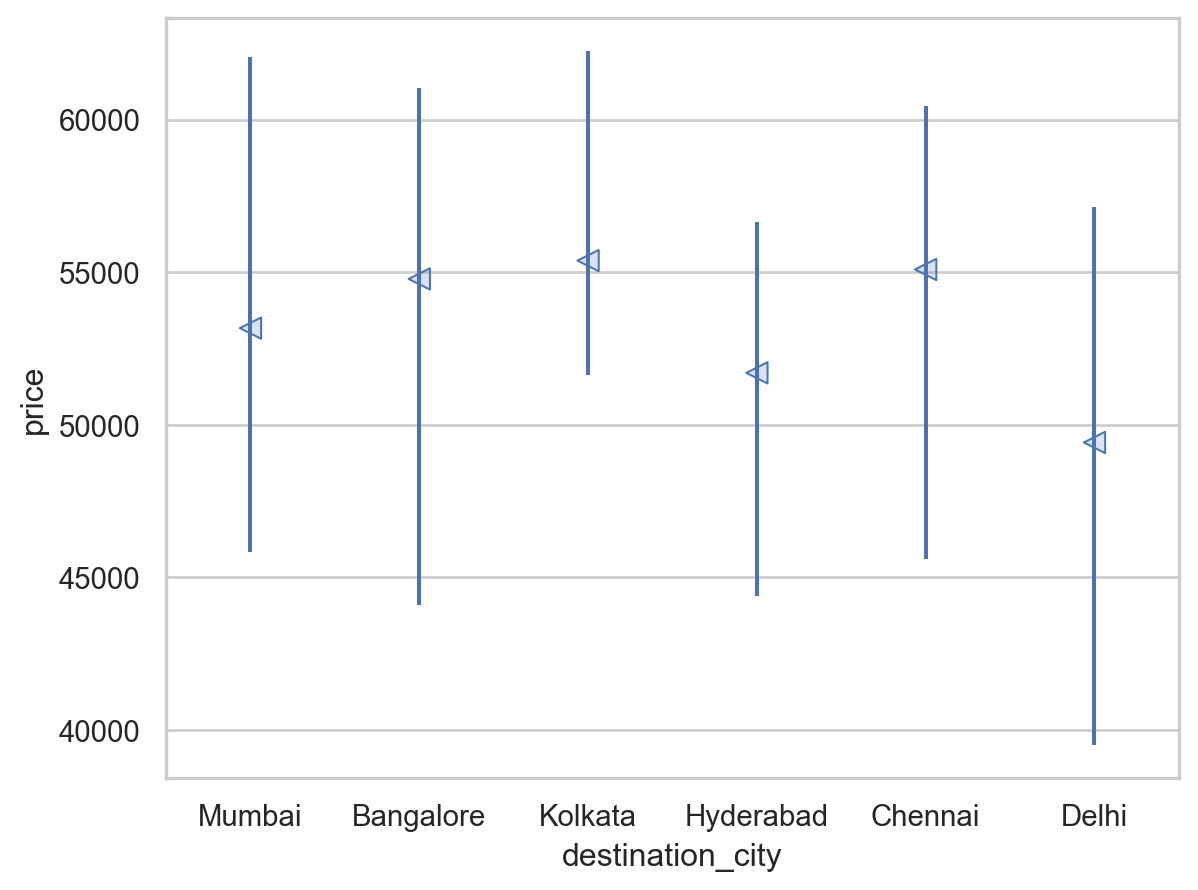

In [28]:
rangeplot(flights.loc[flights['sit_class'] == 'Business'],x='destination_city',y='price')

특정 출발 도시와 도착 도시에 따라 가격이 다르다. 특히 Delhi의 경우 다른 지역에 비해 낮은 가격을 보이고 있다. 아마 데이터 자체도 인도 데이터 이기도 하고 이 가격은 특히 거리나 비행 시간에 영향을 많이 받을 것이다. Delhi의 경우 다른 지역과 거리가 상대적으로 가까워서 가격이 쌀수도 있다. 후에 duration으로 보고자 한다.

### Duration

비행 시간과 Price의 관계를 보고자 한다. 비행시간이 길수록 Price가 큰지 보려고 한다.

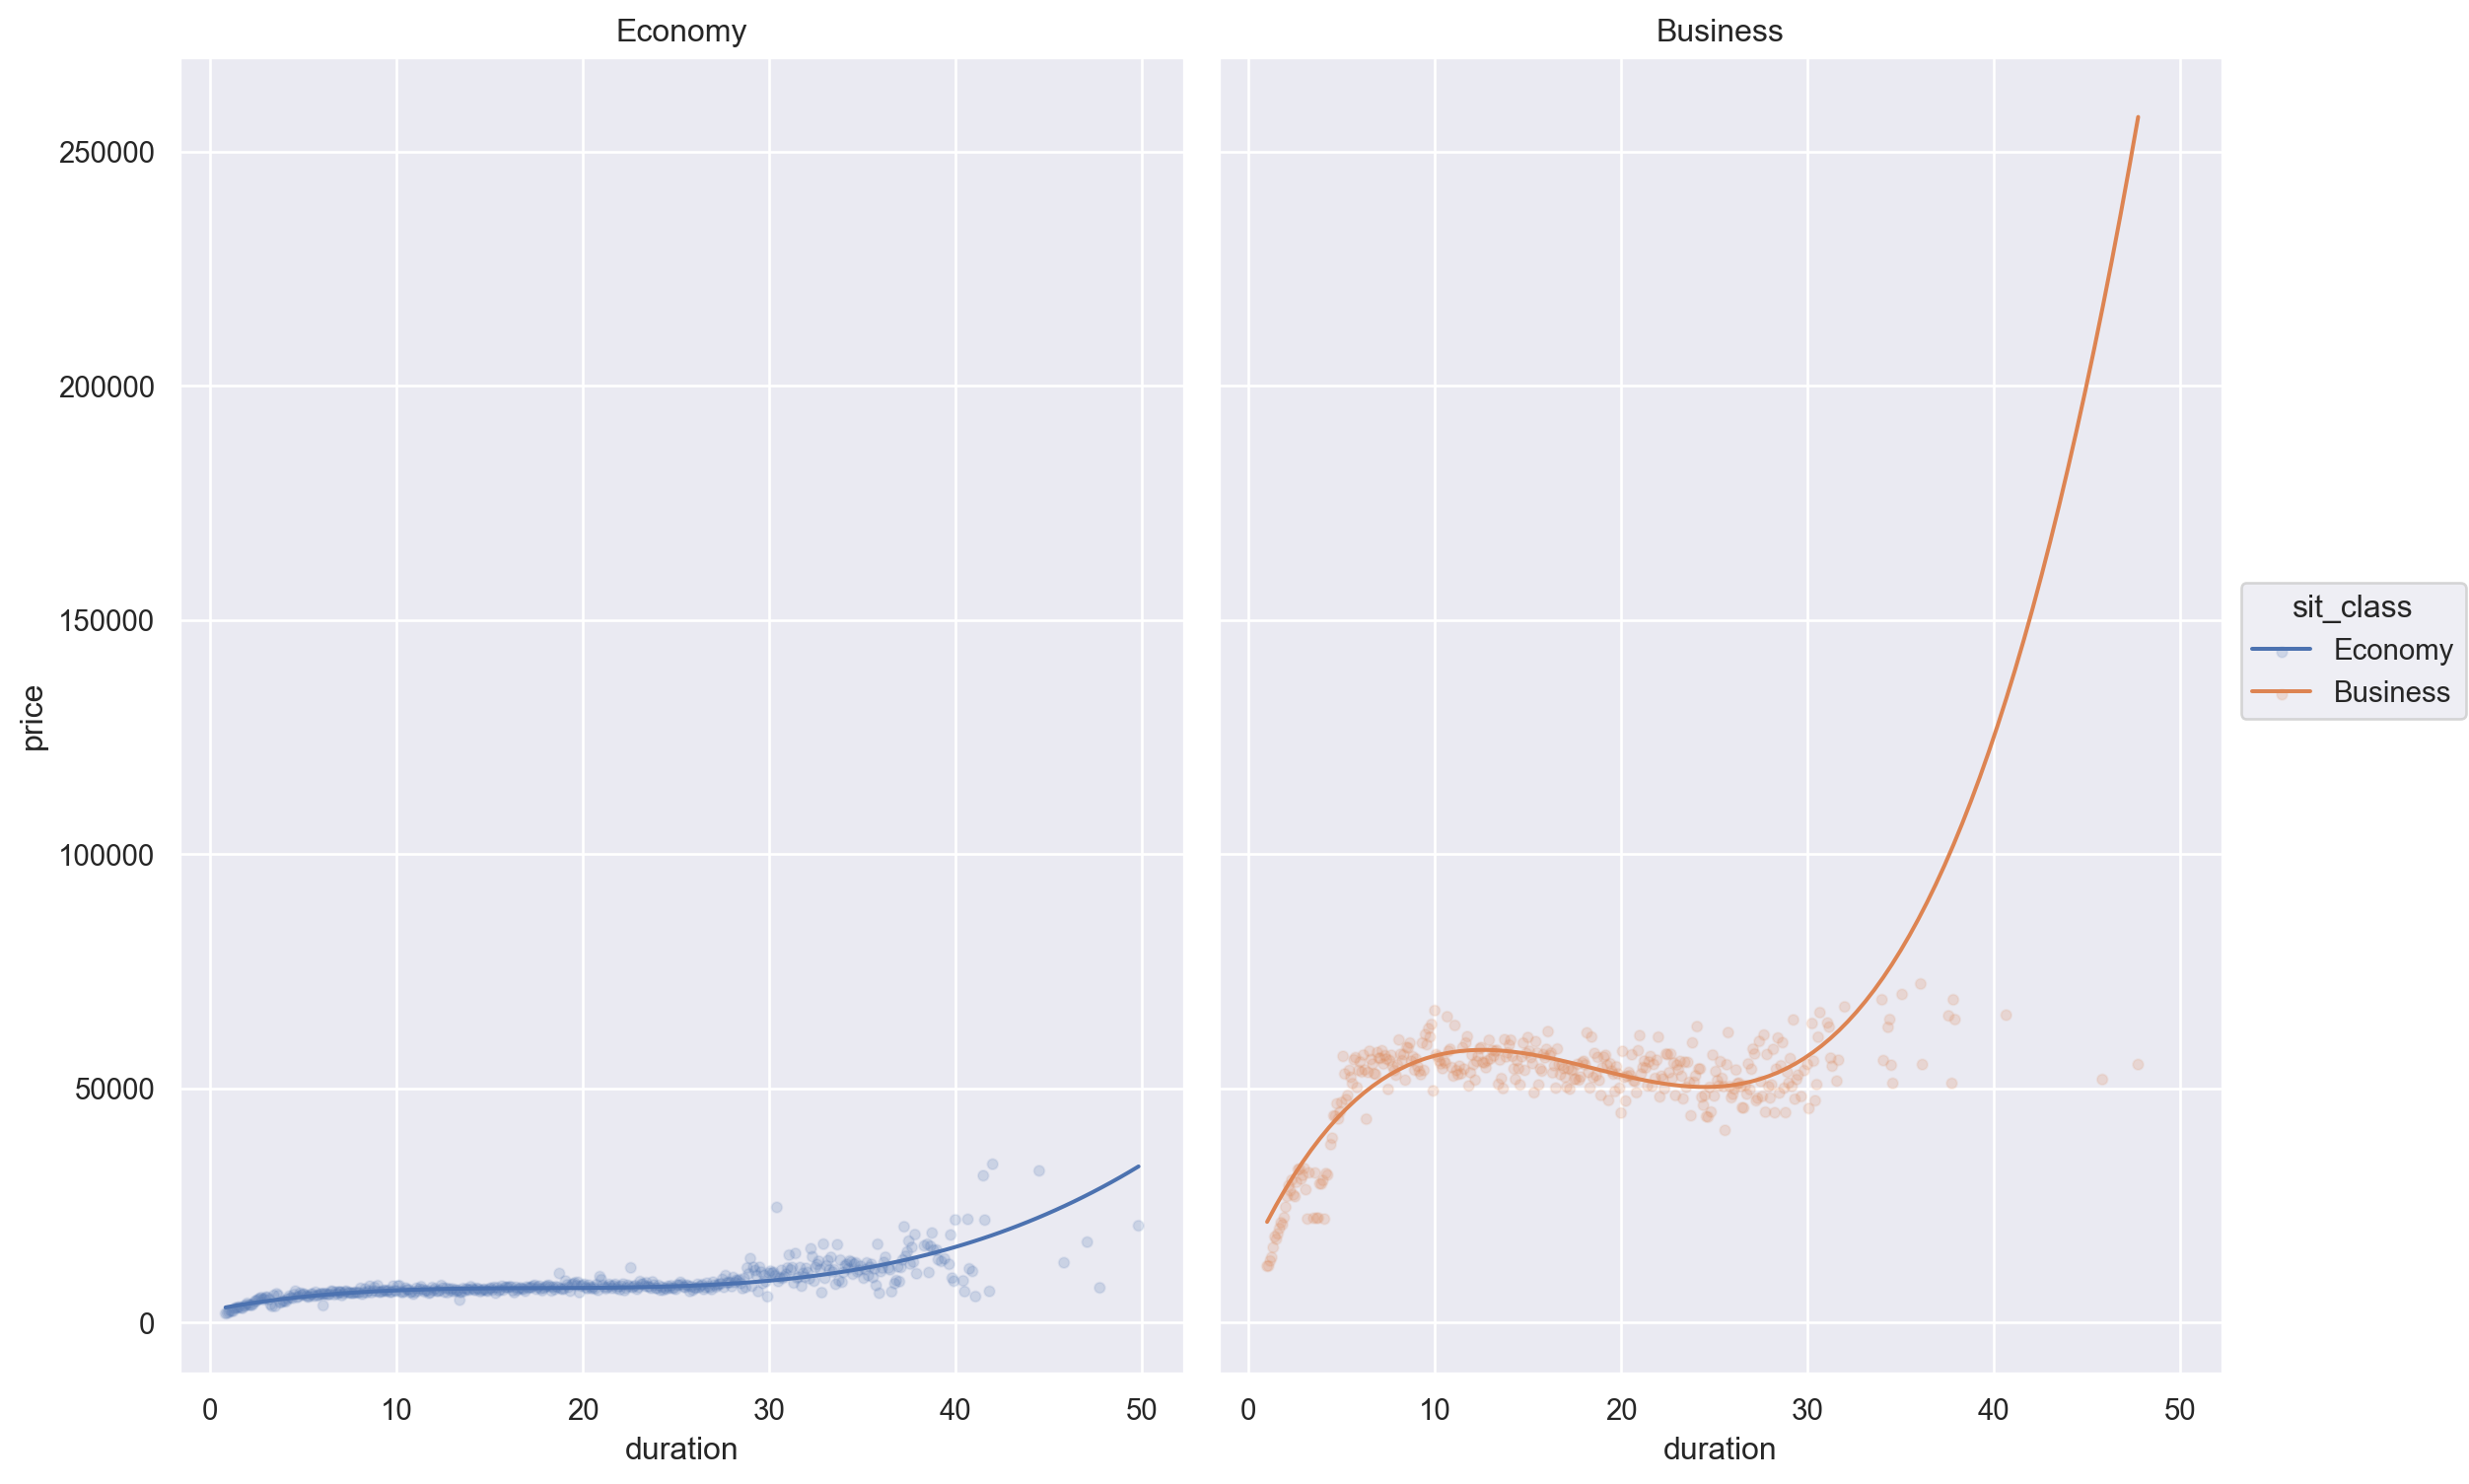

In [29]:
(
    so.Plot(flights,x='duration',y='price',color='sit_class')
    .add(so.Dots(alpha=.1),so.Agg())
    .add(so.Line(),so.PolyFit(3))
    .facet(col='sit_class')
    .layout(size=(12,8))
)

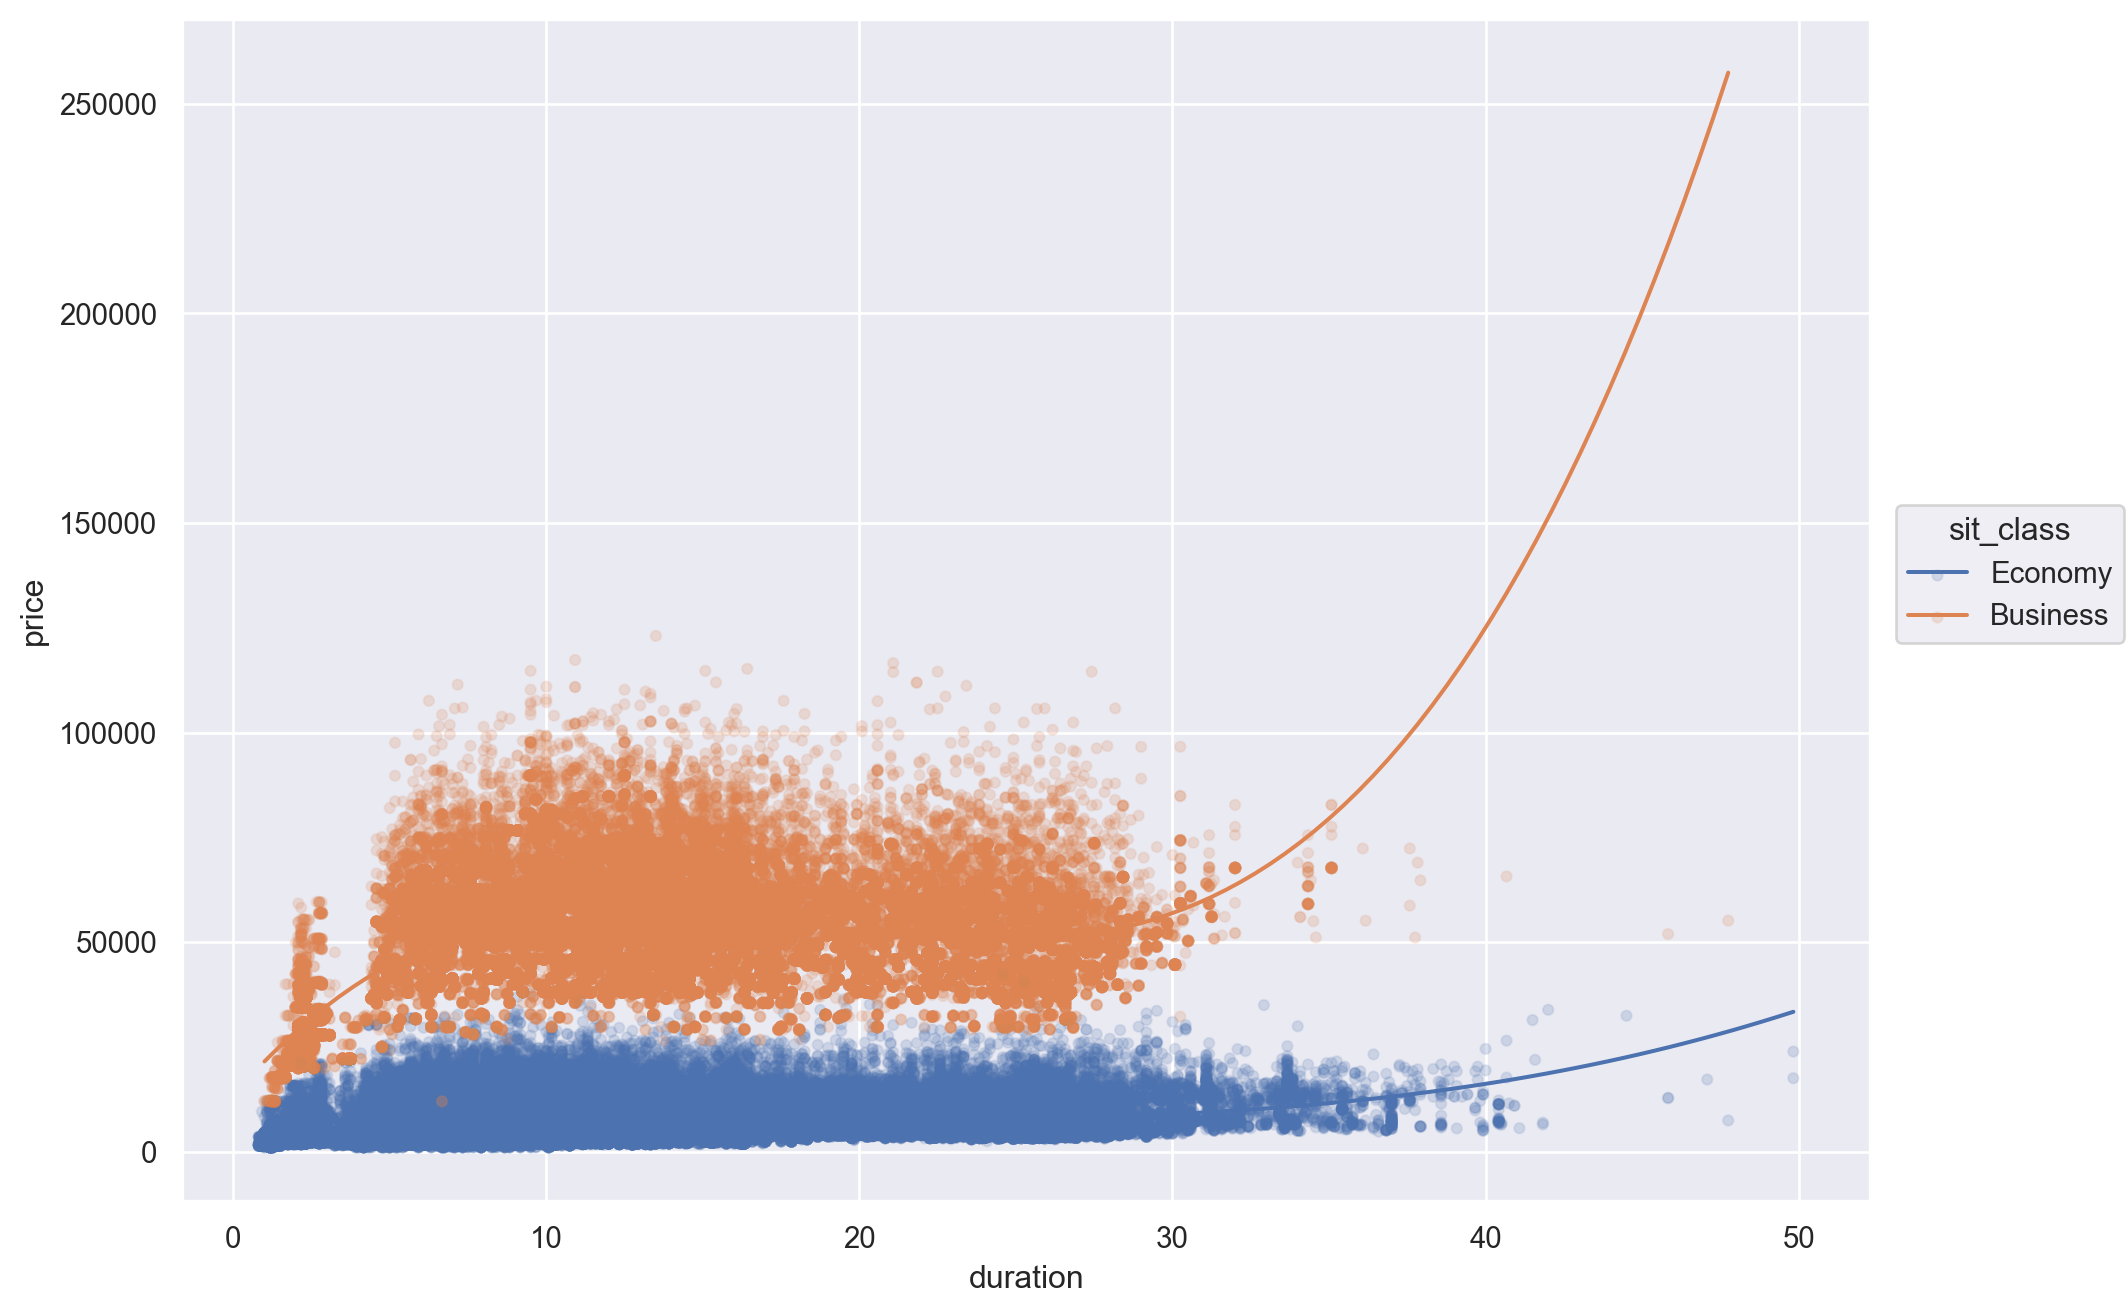

In [30]:
(
    so.Plot(flights,x='duration',y='price',color='sit_class')
    .add(so.Dots(alpha=.1))
    .add(so.Line(),so.PolyFit(3))
    .layout(size=(10,7))
)

duration은 비행 시간을 나타내는데 비행시간이 길수록 price가 증가하는 형태를 보이고 있다. 특히 Business는 duration에 따라 증가하다가 어느정도 거리 사이에서는 가격이 유지 되는데 비행기를 타보면 보통 진짜 먼 곳이나 비싸지 적당한 거리는 비싸지 않음.

### 출발도시와 도착도시 와의 duration 관계

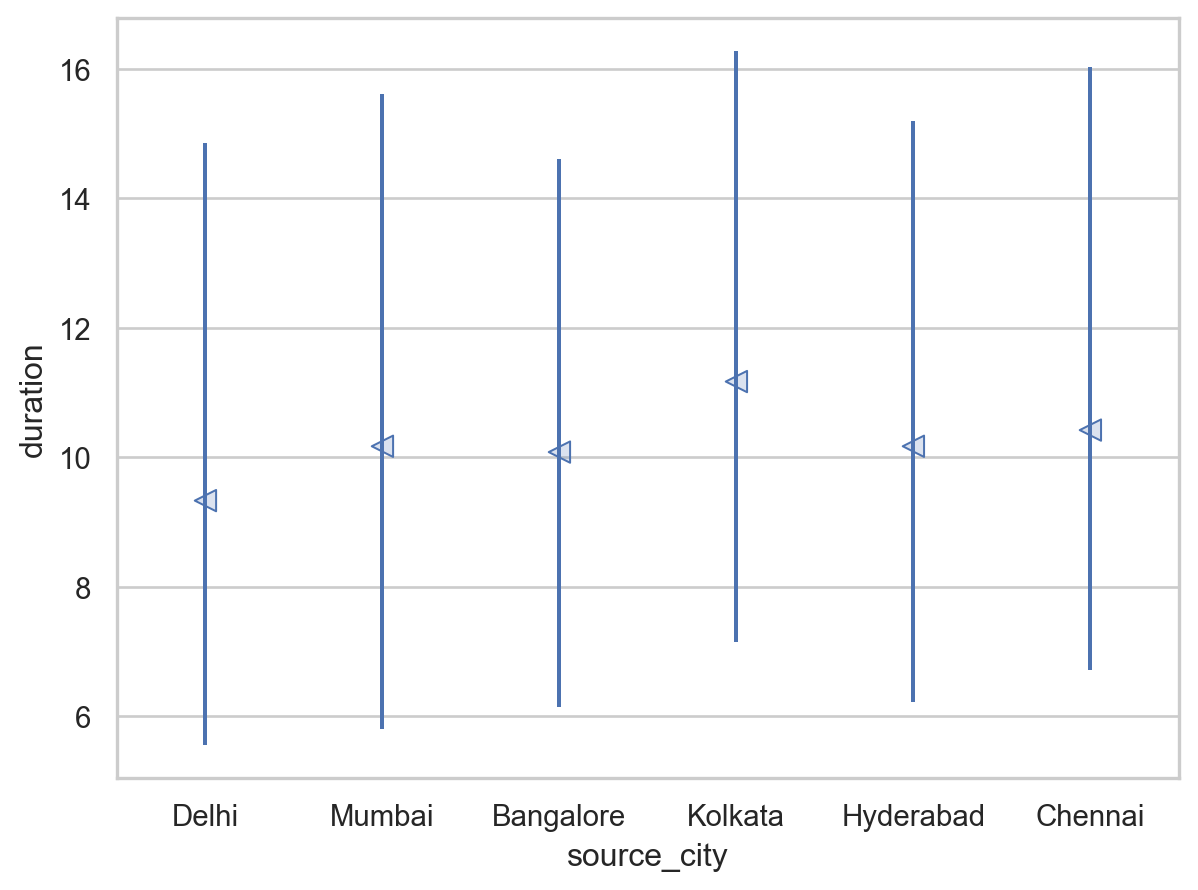

In [31]:
rangeplot(flights.loc[flights['sit_class'] == 'Economy'],x='source_city',y='duration')

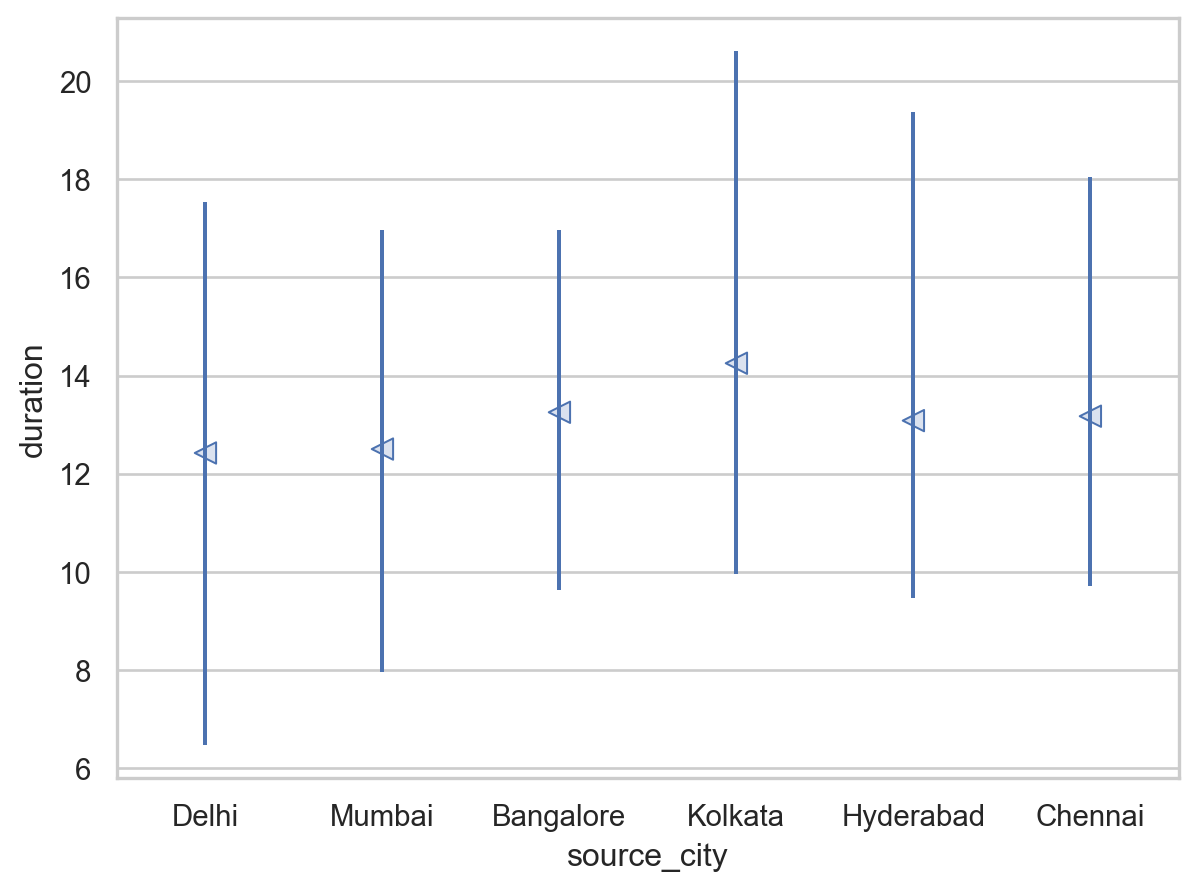

In [32]:
rangeplot(flights.loc[flights['sit_class'] == 'Business'],x='source_city',y='duration')

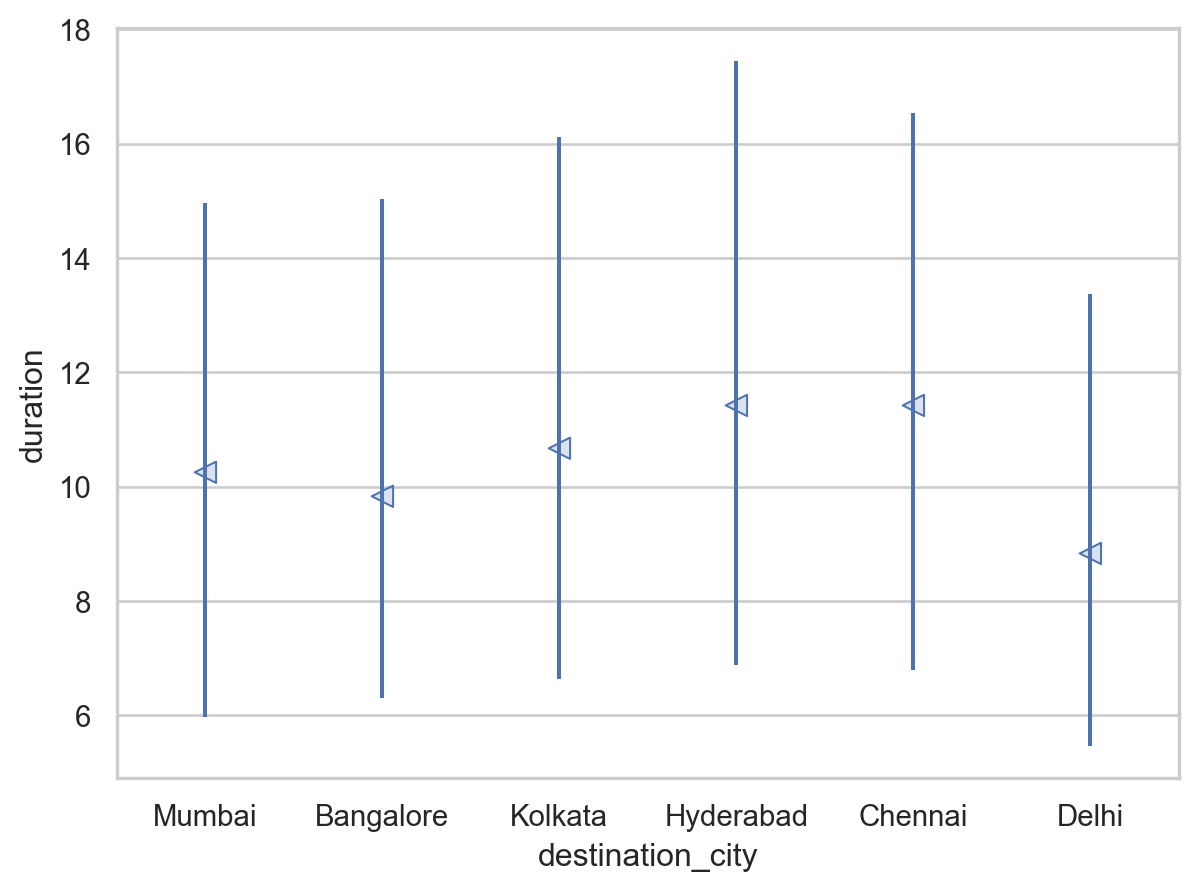

In [33]:
rangeplot(flights.loc[flights['sit_class'] == 'Economy'],x='destination_city',y='duration')

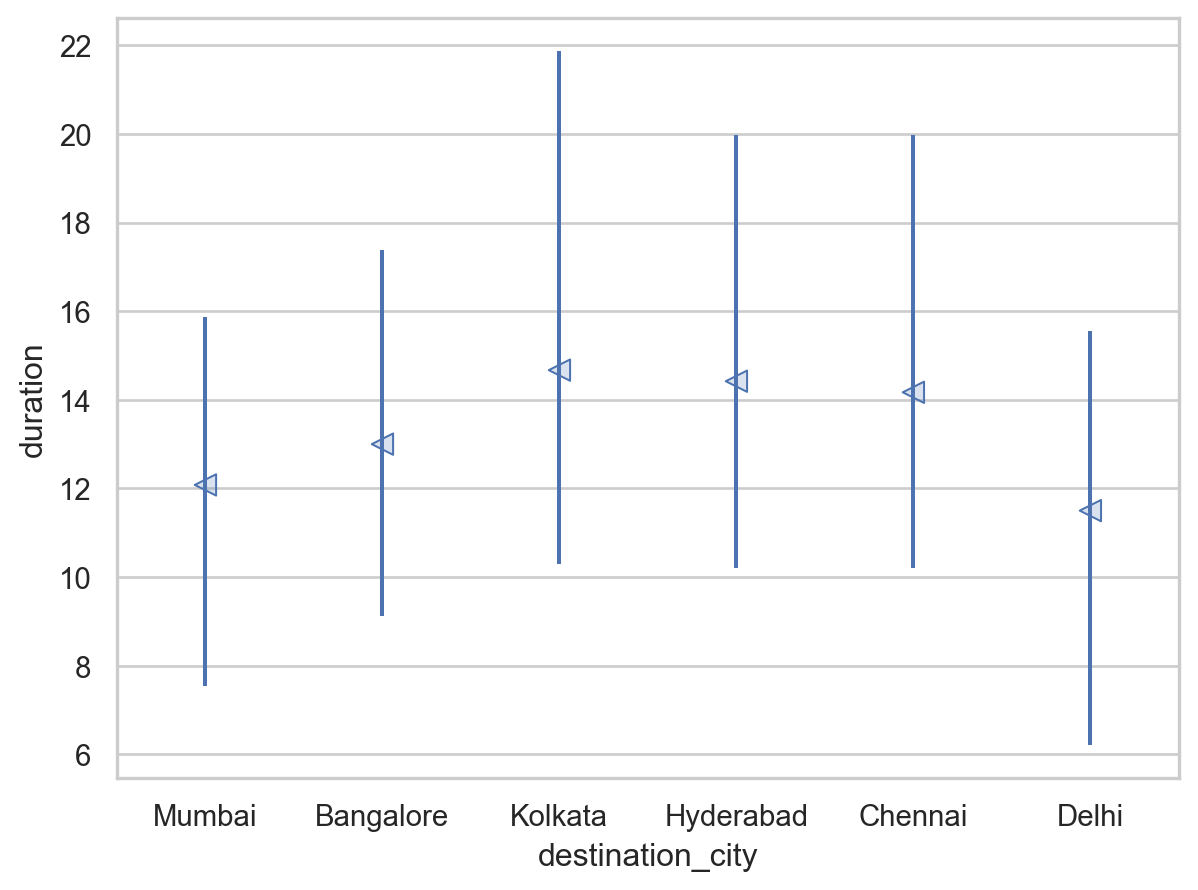

In [34]:
rangeplot(flights.loc[flights['sit_class'] == 'Business'],x='destination_city',y='duration')

출발도시와 도착도시와 Price의 관계와 유사하게 나왔다. 즉, 이들의 가격은 duration으로 많이 설명이 될 것으로 추측된다. 도시가 어디여서 비싸다는 것보단 거리나 시간이 오래 걸려서 비싼 것으로 추측할 수 있다. 물론 비행 시간이 모든 것을 설명할 수 는 없겠지만 연관성이 매우 큰 것 같다.

### Price와 Stop 횟수의 관계

출발도시와 도착 도시 사이의 정지 횟수를 나타낸다. 이들의 횟수가 Price에 영향을 주는지 보고자 한다.

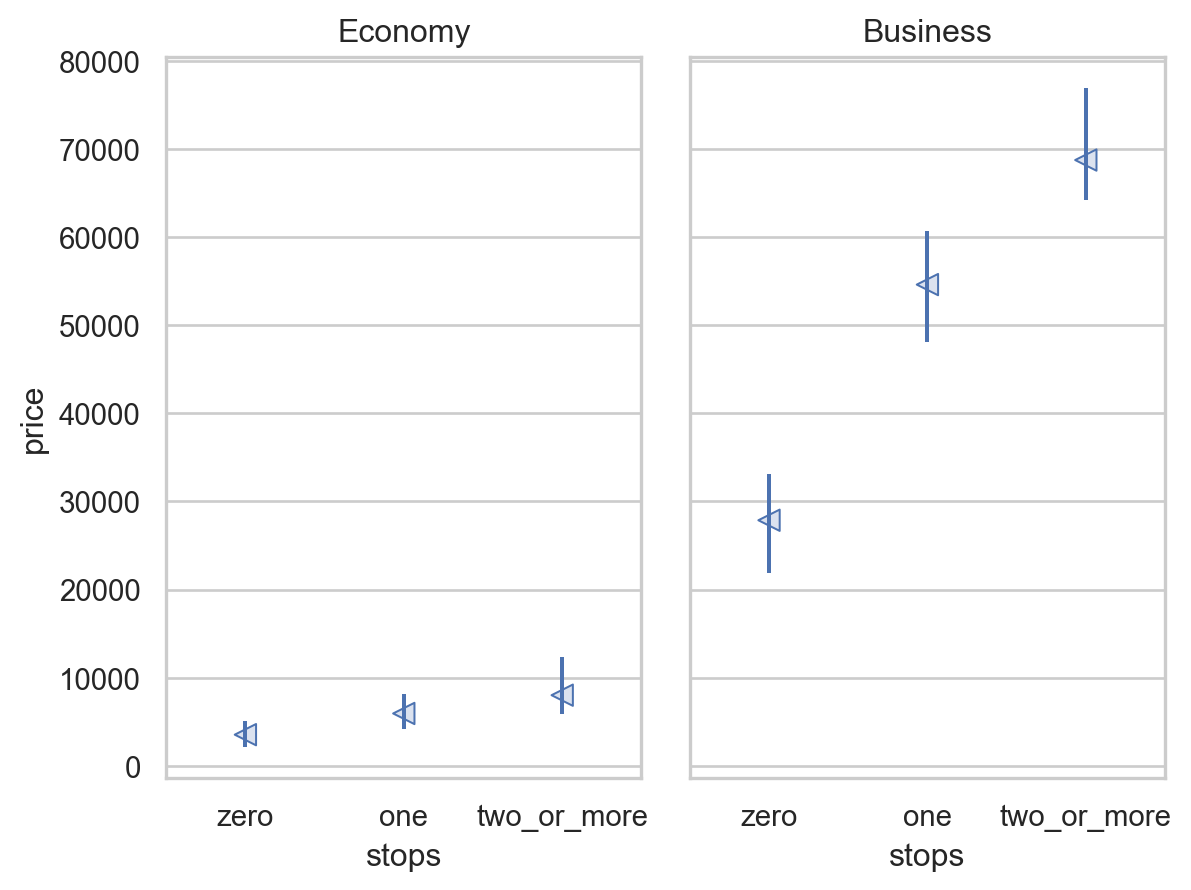

In [35]:
rangeplot(flights,x='stops',y='price').facet('sit_class')

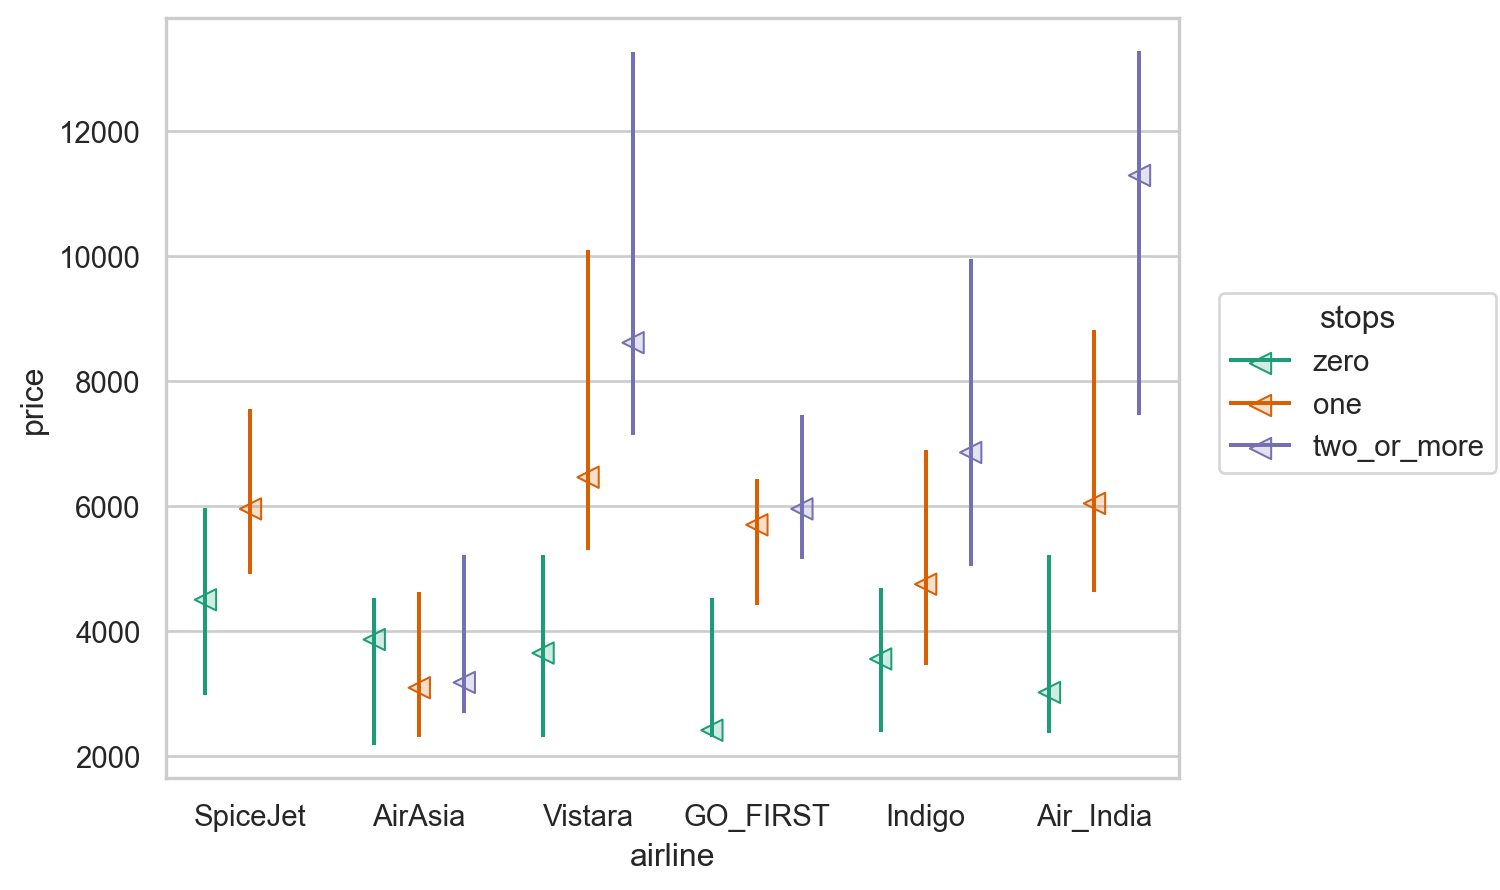

In [36]:
rangeplot(flights.loc[flights['sit_class'] == 'Economy'],x='airline',y='price',color='stops')

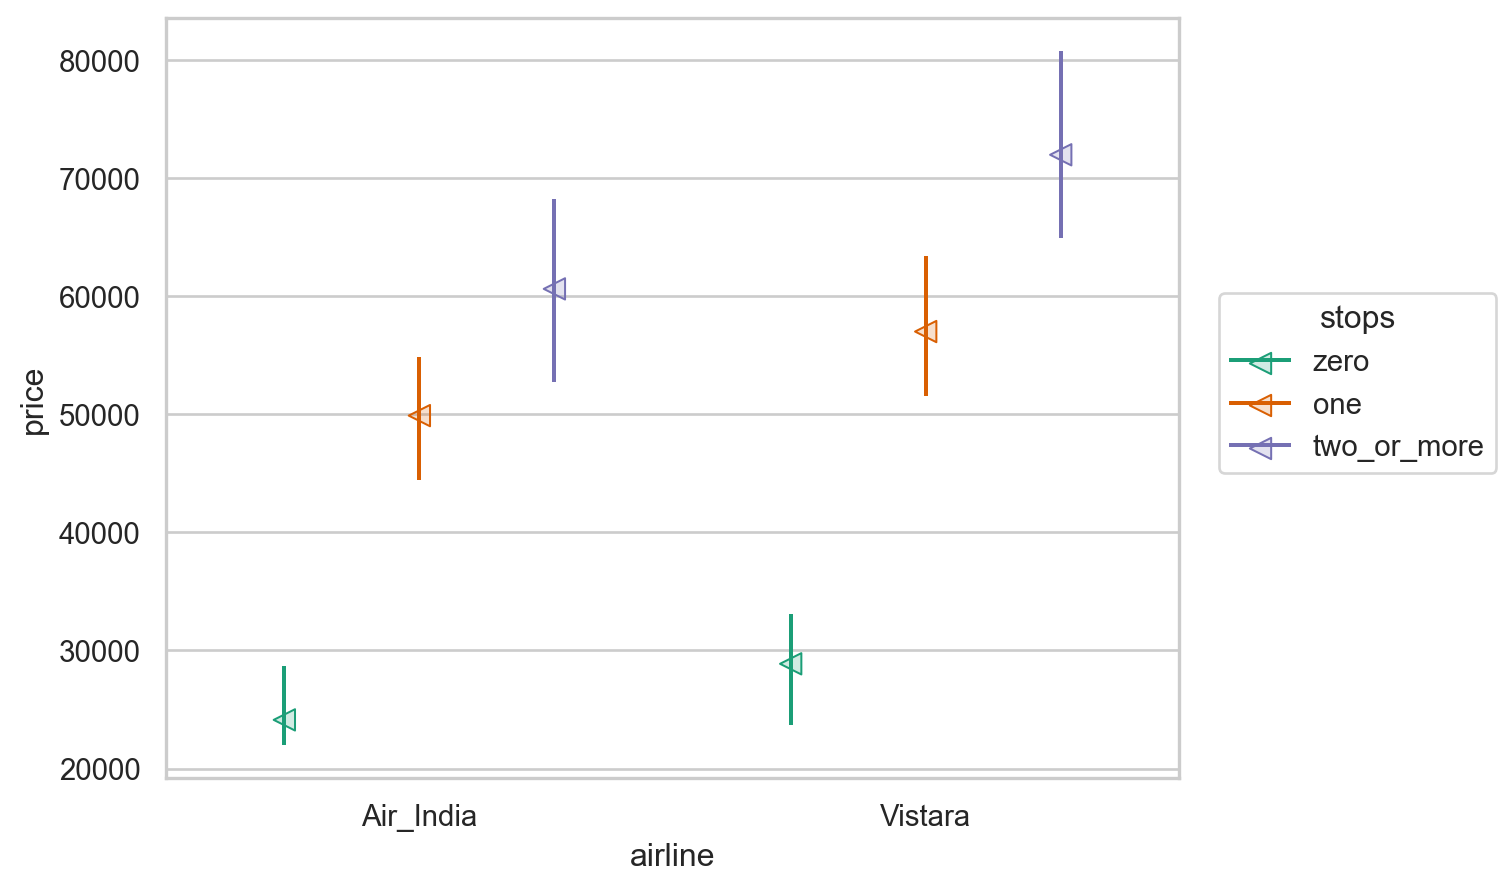

In [37]:
rangeplot(flights.loc[flights['sit_class'] == 'Business'],x='airline',y='price',color='stops')

일반적으로 비행기가 stop 했다는 것은 어느 정도 멀리 간다는 것을 의미할 것이고 stop 횟수가 많을 수록 가격이 증가하는 모습을 보인다. 하지만 AirAsia의 경우 stop 횟수가 가격에 큰 영향을 미치지 못하는 것을 볼때 AirAsia는 다른 형태의 운행을 하고 있는 것으로 보임. (다른 항공사와의 차별점을 두어 운행을 실시하고 이를 통해 사람을 유치하고 기업을 운영하는 것으로 추측됨.) 

EDA를 통해서 본 결과,
sit_class와 airlilne, days_left (term 으로 바꿔서 넣겠음), duration, arrival_time,stops, destination_city가 price와 연관있는 것처럼 보인다.

### 모델 생성

In [38]:
import statsmodels.formula.api as smf

mod1=smf.ols('price ~ sit_class + airline * stops + duration  + C(days_term) + destination_city',flights).fit()

#sit_class 와 duration이 상호작용 한다고 가정
mod2=smf.ols('price ~ sit_class * duration + airline * stops + C(days_term) + destination_city',flights).fit()

In [39]:
print(mod1.rsquared ,mod2.rsquared)

0.9186086604848386 0.9200139958285574


In [40]:
flights['resid_mod1'] = mod1.resid
flights['resid_mod2'] = mod2.resid
flights.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,sit_class,duration,days_left,price,days_term,resid_mod1,resid_mod2
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,little_left,-1773.557150,-1824.696265
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,little_left,-1771.086650,-1805.951880
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,little_left,-1609.162937,-1639.873883


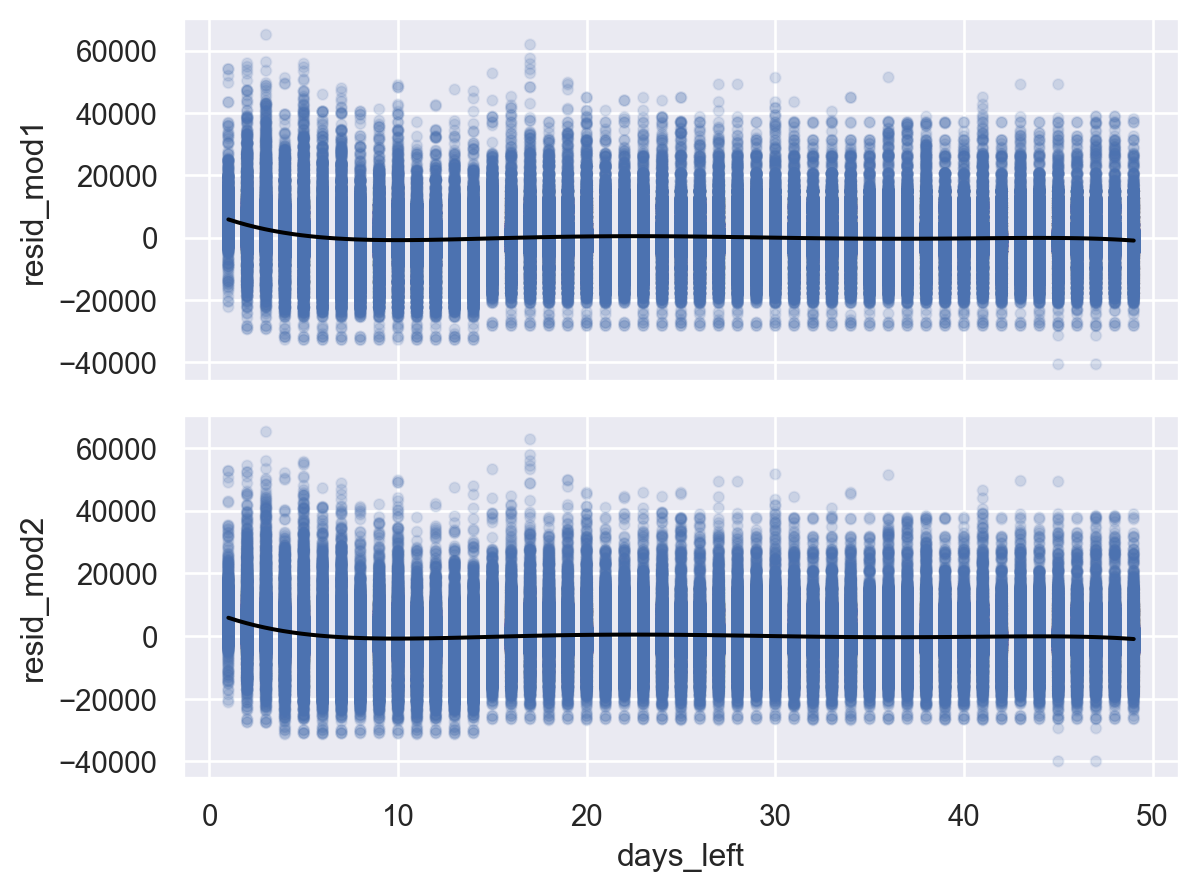

In [41]:
(
    so.Plot(flights,x='days_left')
    .pair(y=['resid_mod1','resid_mod2'])
    .add(so.Dots(alpha=.1))
    .add(so.Line(color='black'),so.PolyFit(5))
)

In [42]:
grid=pd.DataFrame({'sit_class':['Economy','Business']})
grid['airline'] = flights.airline.mode()[0]
grid['stops'] = flights.stops.mode()[0]
grid['duration'] = flights.duration.median()
grid['days_term'] =flights.days_term.mode()[0]
grid['destination_city'] = flights.destination_city.mode()[0]
grid['pred_mod1'] = mod1.predict(grid)
grid['pred_mod2'] = mod2.predict(grid)
grid

,sit_class,airline,stops,duration,days_term,destination_city,pred_mod1,pred_mod2
0,Economy,Vistara,one,11.25,Many_left,Mumbai,9461.199571,9771.862010
1,Business,Vistara,one,11.25,Many_left,Mumbai,54490.086210,54032.564667


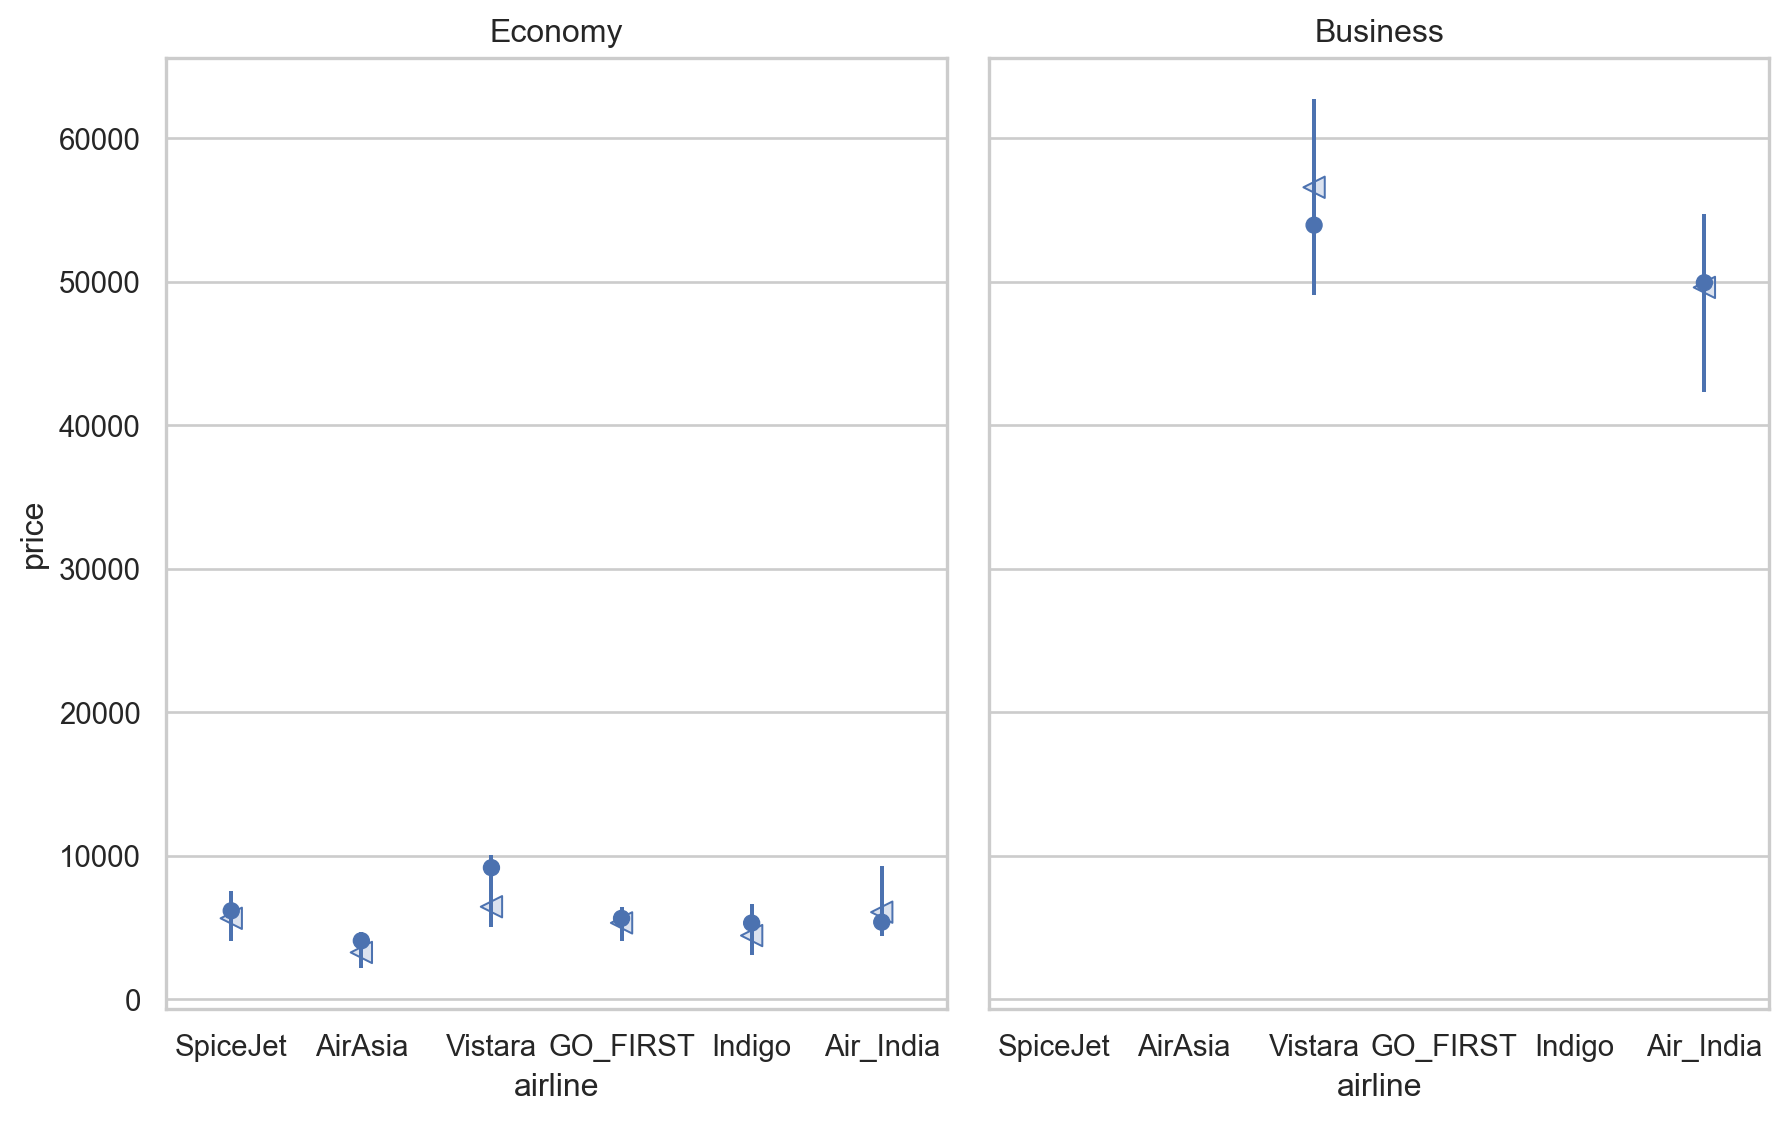

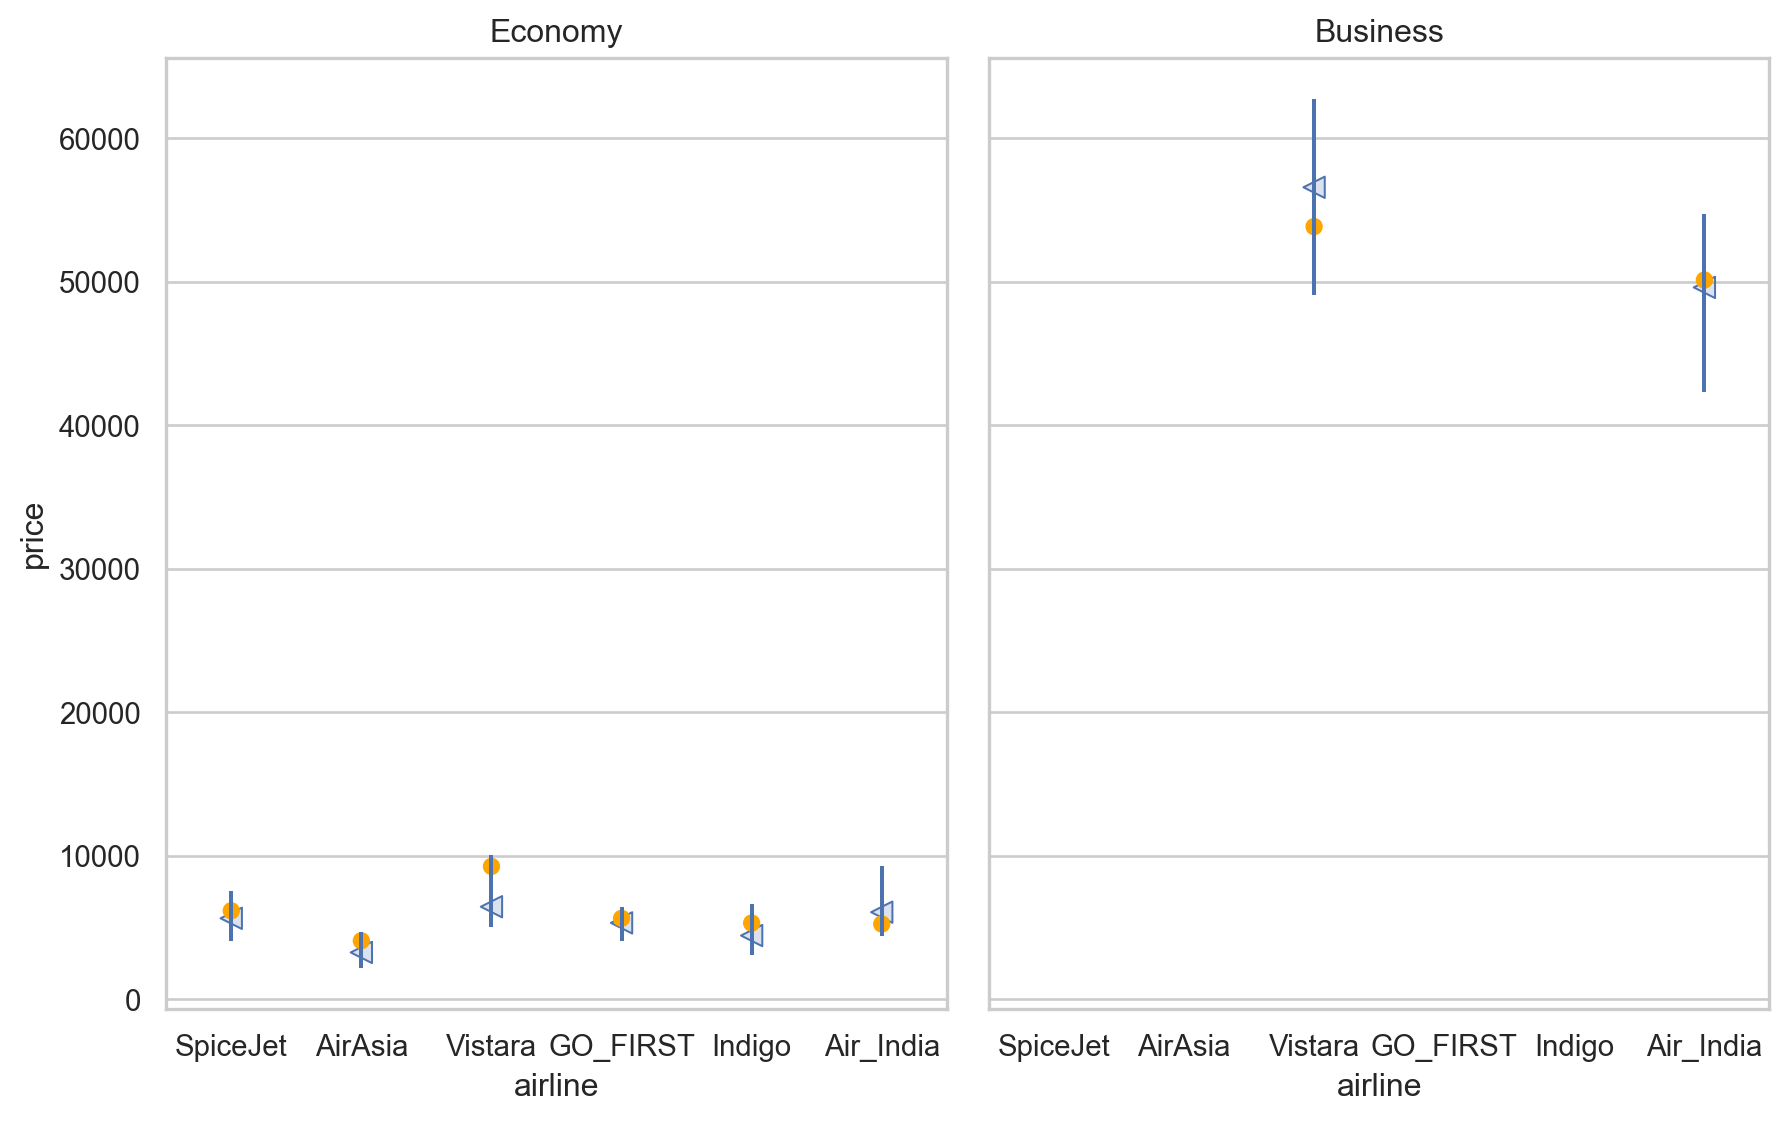

In [43]:
flights['pred_mod1'] = mod1.predict(flights)
flights['pred_mod2'] = mod2.predict(flights)

p=(
    rangeplot(flights,x='airline',y='price')
    .add(so.Dot(),so.Agg('mean'),y='pred_mod1')
    .facet('sit_class')
    .layout(size=(9.5,6))
)
p1=(
    rangeplot(flights,x='airline',y='price')
    .add(so.Dot(color='orange'),so.Agg('mean'),y='pred_mod2')
    .facet('sit_class')
    .layout(size=(9.5,6))
)
display(p,p1)

In [44]:
flights_models= flights.melt(
    id_vars=['duration','sit_class'],
    value_vars= ['resid_mod1','resid_mod2'],
    var_name='model',
    value_name='residual'
)
flights_models.head(3)

,duration,sit_class,model,residual
0,2.17,Economy,resid_mod1,-1773.557150
1,2.33,Economy,resid_mod1,-1771.086650
2,2.17,Economy,resid_mod1,-1609.162937


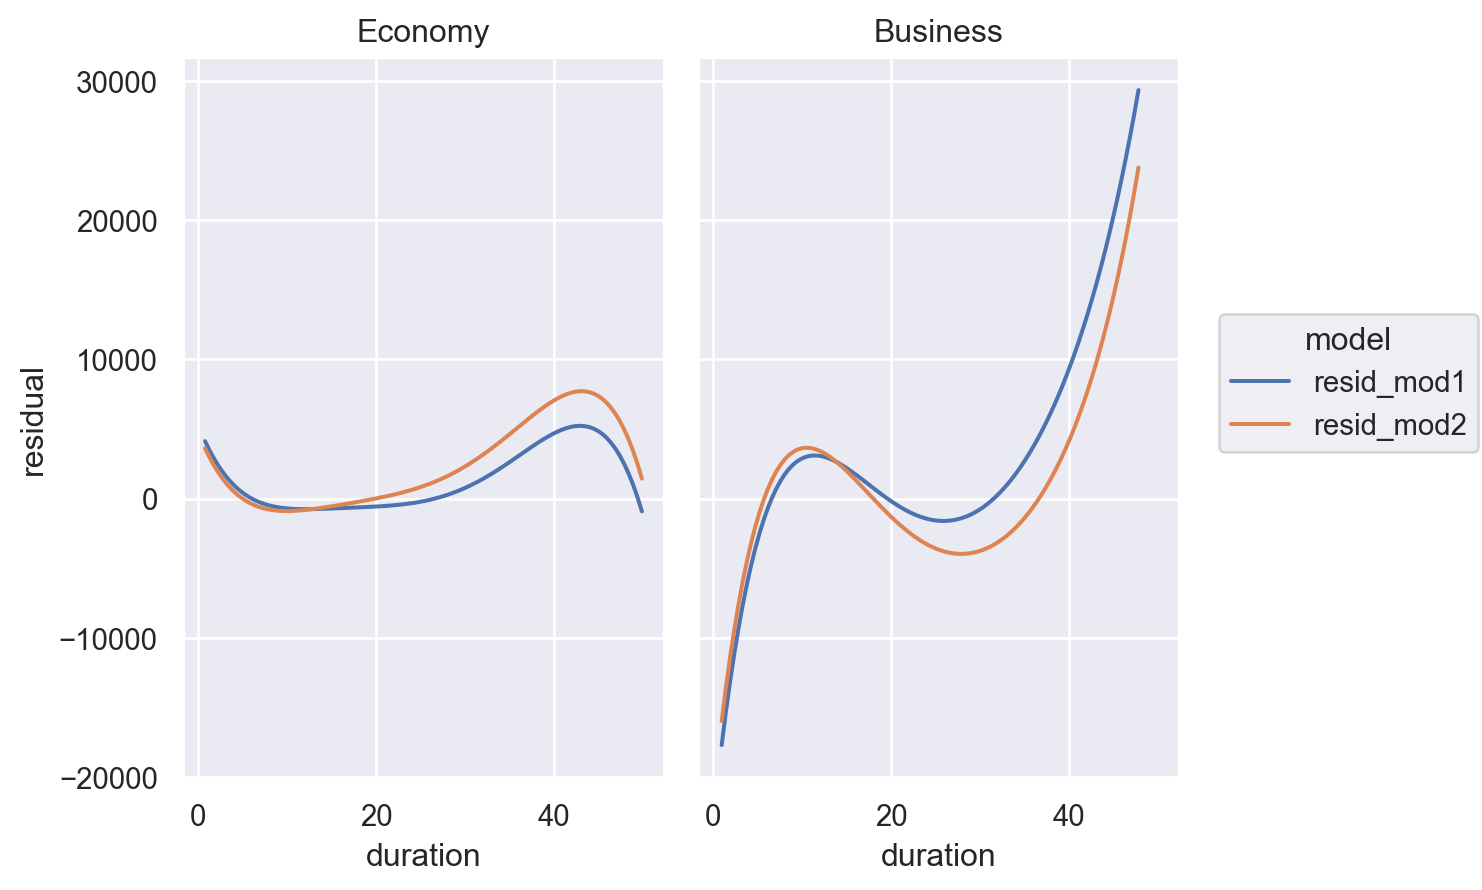

In [45]:
(
    so.Plot(flights_models,x='duration',y='residual',color='model')
    .add(so.Line(),so.PolyFit(5))
    .facet('sit_class')
)

model1이 잔차를 좀 더 잘 잡아줌 또한 모델 복잡도와 관련되서 overfitting의 문제도 있기에 상대적으로 비슷하다면 model1이 낫다고 판단함.

In [46]:
print(mod1.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
No. Observations:              300153   F-statistic:                 1.411e+05
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  3623.1392     69.660     52.011      0.000    3486.607    3759.672
sit_class[T.Business]                      4.503e+04     28.937   1556.103      0.000     4.5e+04    4.51e+04
airline[T.Air_India]                       1679.1019     68.102     24.656      0.000    1545.624    1812.579
airline[T.GO_FIRST]                        1826.3493   

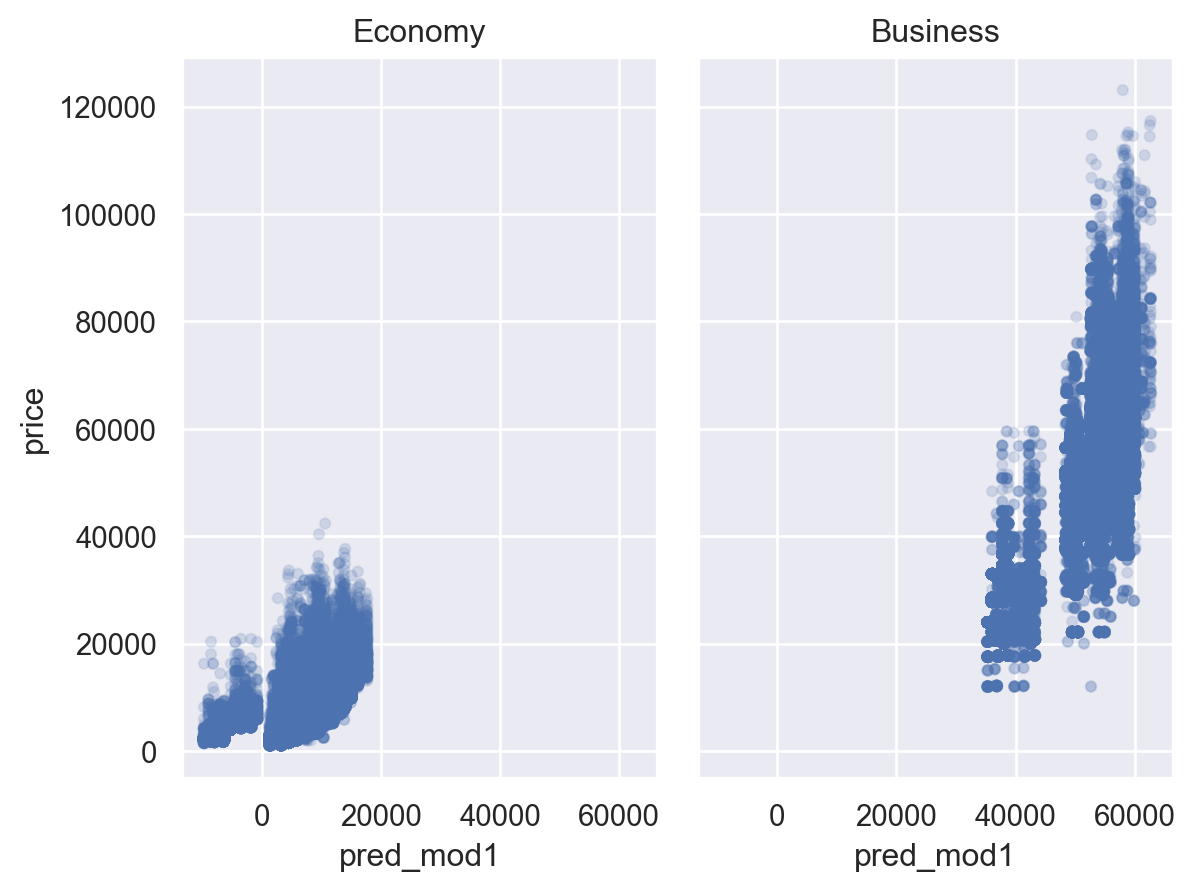

In [47]:
(
    so.Plot(flights,x='pred_mod1',y='price')
    .add(so.Dots(alpha=.1))
    .facet('sit_class')
)

In [48]:
mod1= smf.ols("price ~ sit_class",flights).fit()
mod2= smf.ols("price ~ sit_class + C(days_term)",flights).fit()
mod3= smf.ols("price ~ sit_class + C(days_term) + airline ",flights).fit()
mod4= smf.ols("price ~ sit_class + C(days_term) + airline + duration" ,flights).fit()
mod5= smf.ols("price ~ sit_class + airline * stops + C(days_term) + duration + destination_city" ,flights).fit()

print(
    f" sit_class : {mod1.rsquared}\n",
    f"sit_class + days_term : {mod2.rsquared}\n",
    f"sit_class + days_term + airline : {mod3.rsquared}\n",
    f"sit_class + days_term + airline + duration : {mod4.rsquared}\n",
    f"sit_class + airline * stops + C(days_term) + duration + destination_city : {mod5.rsquared}\n"
)

 sit_class : 0.8795819871568895
 sit_class + days_term : 0.8871527934113065
 sit_class + days_term + airline : 0.8937962910789157
 sit_class + days_term + airline + duration : 0.8988839845224218
 sit_class + airline * stops + C(days_term) + duration + destination_city : 0.9186086604848386



### 결론
모델을 구성했을 때도 역시 sit_class이 설명하는 영역이 매우 컸다. 추가적으로 day_term은 9%로 추가적으로 설명했고, airline은 6%이고 duration은 6%, 나머지 stop 등을 포함해서 최종 R^2은 91.8%이다.